In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from data_prep import DataPrep
from data_plotting import DataPlotting

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5



# Loading data

In [2]:
file_path = './data/v1_CLD/AE_1D/200709-195219_195222'
data_prep = DataPrep(file_path)
data = data_prep.load_data(1, 'timestamp', True)

Data  1  : 
./data/v1_CLD/AE_1D/200709-195219_195222\c.txt loaded.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 445773 entries, 2020-07-09 10:52:20.770000 to 2020-07-09 11:05:40.811000
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   mag_x        445773 non-null  float64
 1   mag_y        445773 non-null  float64
 2   mag_z        445773 non-null  float64
 3   mag_acc      445773 non-null  int64  
 4   acc_x        445773 non-null  float64
 5   acc_y        445773 non-null  float64
 6   acc_z        445773 non-null  float64
 7   acc_acc      445773 non-null  int64  
 8   gyro_x       445773 non-null  float64
 9   gyro_y       445773 non-null  float64
 10  gyro_z       445773 non-null  float64
 11  gyro_acc     445773 non-null  int64  
 12  pos_lat      445773 non-null  float64
 13  pos_lng      445773 non-null  float64
 14  pos_acc      445773 non-null  float64
 15  update_from  445773 non-null  object 


In [3]:
data = data_prep.total_intensity()

<div>
    <img src="data/earth_magnetic_field.jpg" width="250" style="float: left;">
</div>

$H = \sqrt{X^2 + Y^2}$
<br>
<br>
$F = \sqrt{H^2 + Z^2}$

In [4]:
data[0].head()

mag_x  mag_y  mag_z      mag_f  mag_acc     acc_x  \
timestamp                                                                    
2020-07-09 10:52:20.770  -10.2   19.5  -46.0  50.993039        3  0.644040   
2020-07-09 10:52:20.784  -10.2   19.5  -46.0  50.993039        3  0.636858   
2020-07-09 10:52:20.785  -10.2   19.5  -46.0  50.993039        3  0.636858   
2020-07-09 10:52:20.785  -10.2   19.5  -46.0  50.993039        3  0.636858   
2020-07-09 10:52:20.786  -10.2   19.5  -46.0  50.993039        3  0.636858   

                            acc_y     acc_z  acc_acc    gyro_x    gyro_y  \
timestamp                                                                  
2020-07-09 10:52:20.770  3.403358  9.475053        3  0.078830  0.142745   
2020-07-09 10:52:20.784  3.345897  9.524135        3  0.078830  0.142745   
2020-07-09 10:52:20.785  3.345897  9.524135        3  0.078830  0.142745   
2020-07-09 10:52:20.785  3.345897  9.524135        3  0.075634  0.121440   
2020-07-09 10:52:20.786  3.345897  9.524135        3  0.075634  0.121440   

                           gyro_z  gyro_acc    pos_lat     pos_lng  pos_acc  \
timestamp                                                                     
2020-07-09 10:52:20.770  0.033023         3  35.145675  129.007296   12.965   
2020-07-09 10:52:20.784  0.033023         3  35.145675  129.007296   12.965   
2020-07-09 10:52:20.785  0.033023         3  35.145675  129.007296   12.965   
2020-07-09 10:52:20.785  0.033023         3  35.145675  129.007296   12.965   
2020-07-09 10:52:20.786  0.033023         3  35.145675  129.007296   12.965   

                        update_from  
timestamp                            
2020-07-09 10:52:20.770         GPS  
2020-07-09 10:52:20.784         acc  
2020-07-09 10:52:20.785         mag  
2020-07-09 10:52:20.785        gyro  
2020-07-09 10:52:20.786         acc

In [5]:
data[1].head()

mag_x  mag_y      mag_z      mag_f  mag_acc  \
timestamp                                                              
2020-07-09 10:52:26.064  -23.1   -3.1 -50.600002  55.709786        3   
2020-07-09 10:52:26.068  -23.1   -3.1 -50.600002  55.709786        3   
2020-07-09 10:52:26.069  -23.1   -3.1 -50.600002  55.709786        3   
2020-07-09 10:52:26.069  -23.1   -3.1 -50.600002  55.709786        3   
2020-07-09 10:52:26.076  -23.1   -3.1 -50.600002  55.709786        3   

                            acc_x     acc_y     acc_z  acc_acc    gyro_x  \
timestamp                                                                  
2020-07-09 10:52:26.064 -0.396240  4.759673  8.582016        3  0.045806   
2020-07-09 10:52:26.068 -0.339977  4.763264  8.522161        3  0.045806   
2020-07-09 10:52:26.069 -0.339977  4.763264  8.522161        3  0.045806   
2020-07-09 10:52:26.069 -0.339977  4.763264  8.522161        3  0.042611   
2020-07-09 10:52:26.076 -0.361524  4.788404  8.535329        3  0.042611   

                           gyro_y    gyro_z  gyro_acc   pos_lat     pos_lng  \
timestamp                                                                     
2020-07-09 10:52:26.064 -0.003196 -0.030893         3  35.14803  129.006742   
2020-07-09 10:52:26.068 -0.003196 -0.030893         3  35.14803  129.006742   
2020-07-09 10:52:26.069 -0.003196 -0.030893         3  35.14803  129.006742   
2020-07-09 10:52:26.069 -0.009587 -0.028762         3  35.14803  129.006742   
2020-07-09 10:52:26.076 -0.009587 -0.028762         3  35.14803  129.006742   

                         pos_acc update_from  
timestamp                                     
2020-07-09 10:52:26.064   1700.0         GPS  
2020-07-09 10:52:26.068   1700.0         acc  
2020-07-09 10:52:26.069   1700.0         mag  
2020-07-09 10:52:26.069   1700.0        gyro  
2020-07-09 10:52:26.076   1700.0         acc

## Plotting data

In [7]:
data_plotting = DataPlotting()

### First data

In [8]:
dir_name = 'E8508BDFF2AE'
file_name = '20200709_195219'

Start :
 2020-07-09 10:52:20.770000
End :
 2020-07-09 11:05:40.811000
Time delta :
 0 days 00:13:20.041000
Shape :
 (445773, 17) 



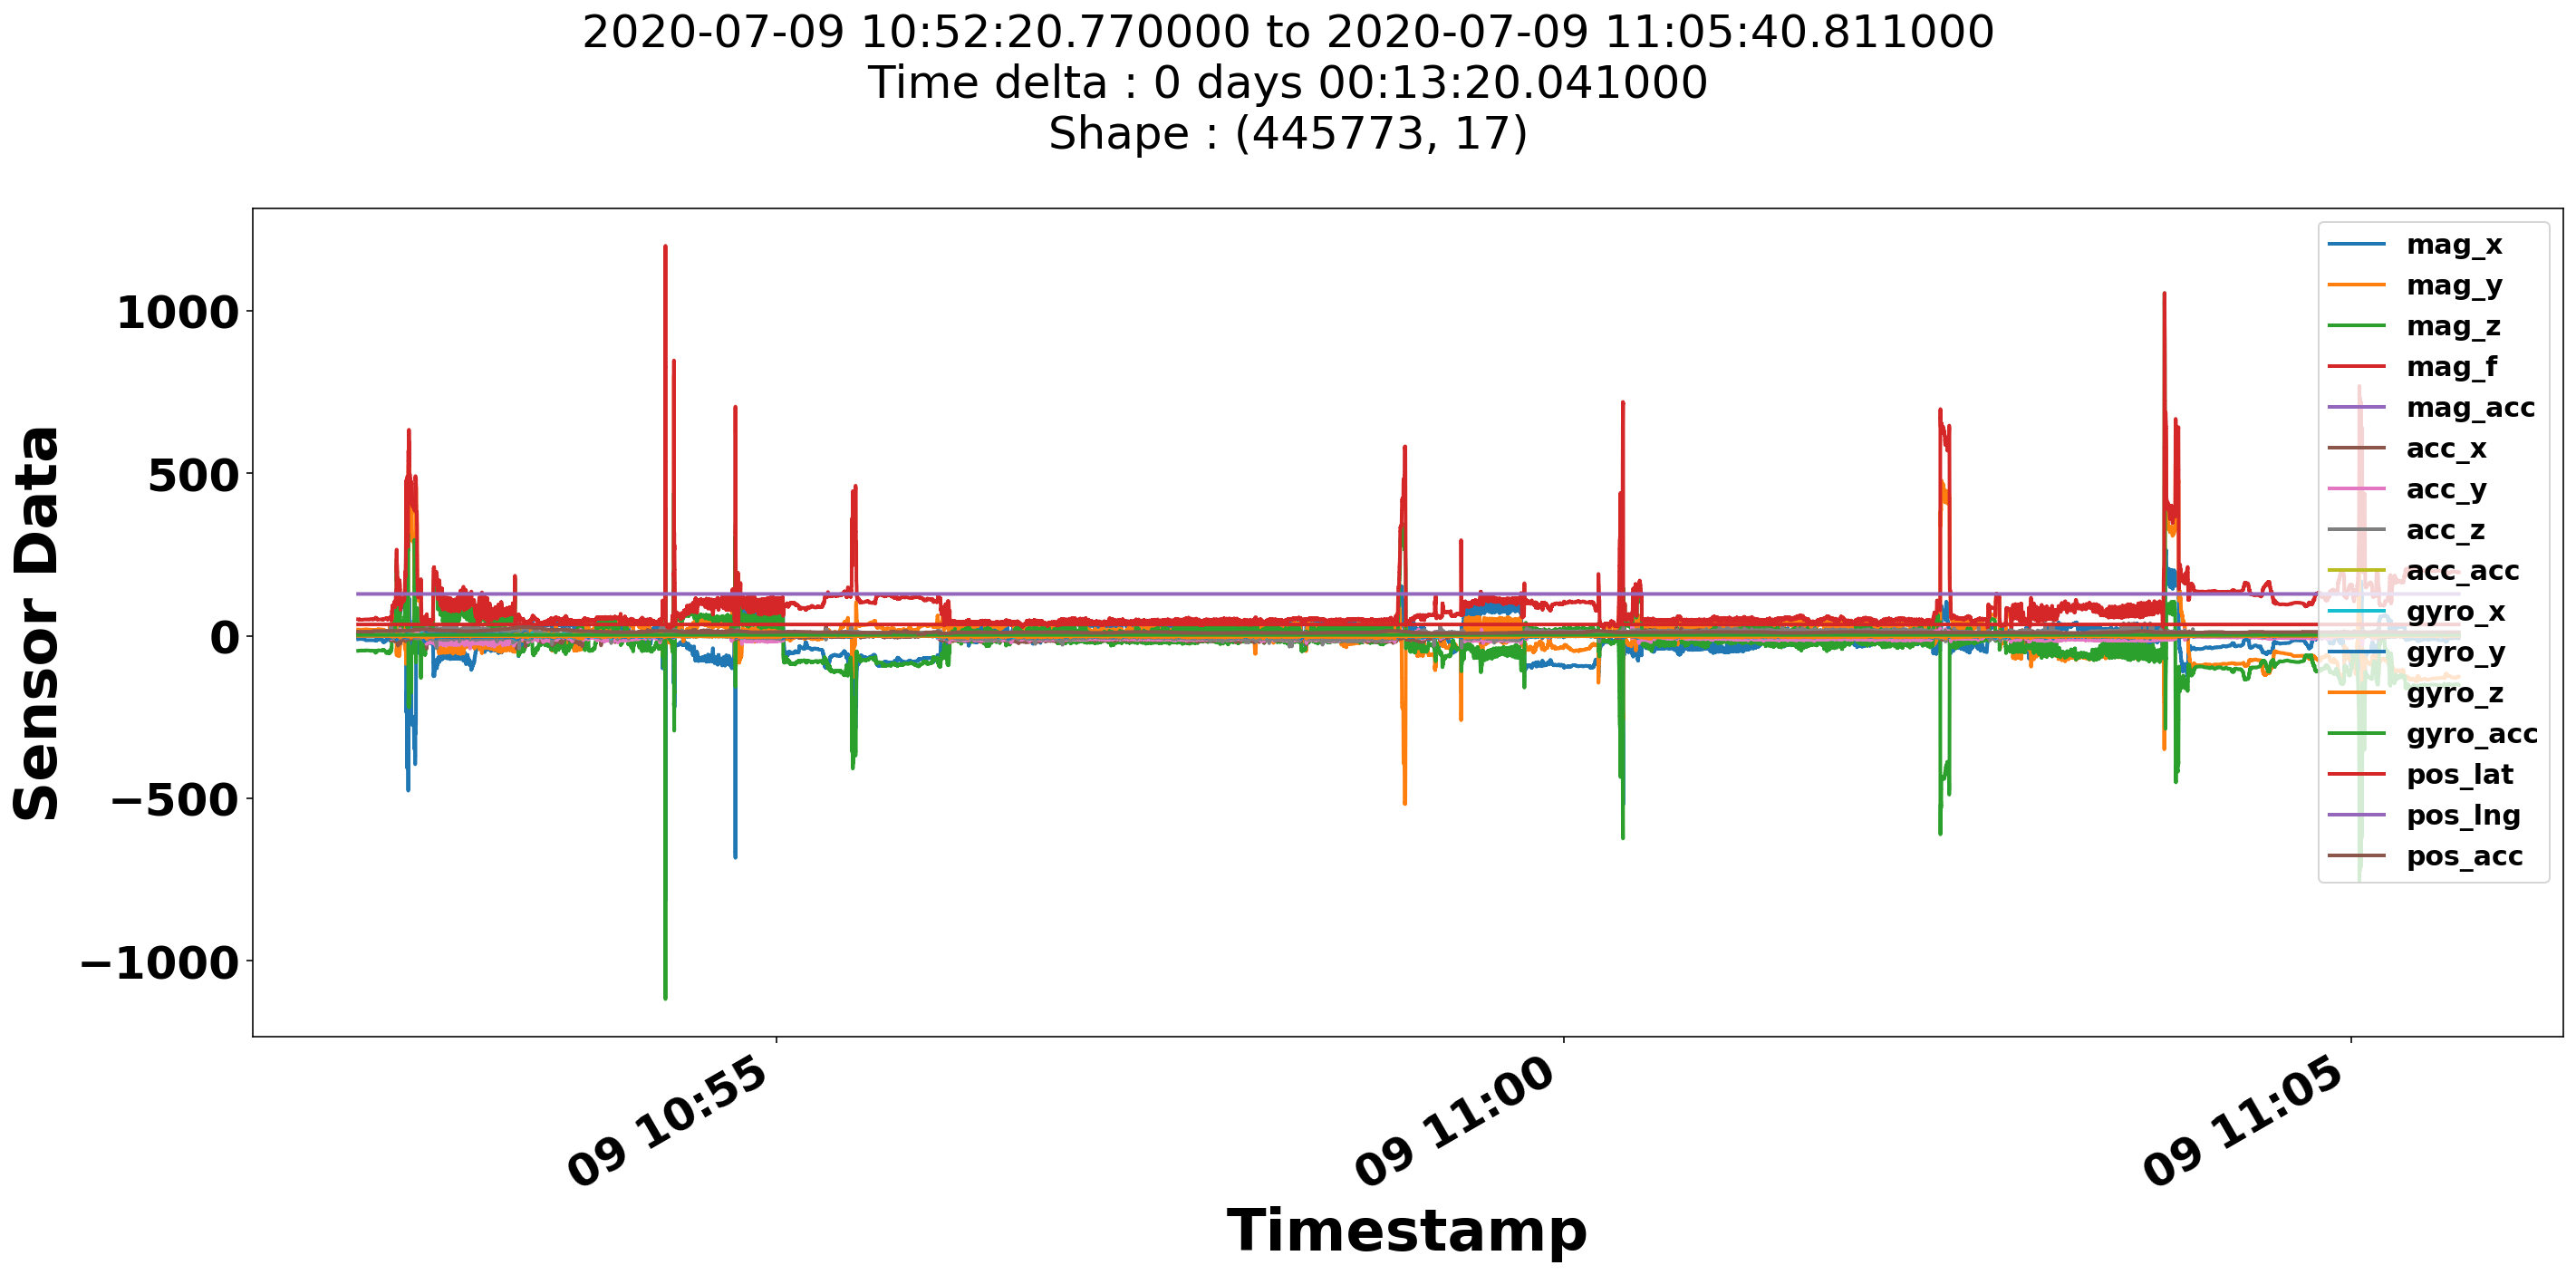

In [9]:
data_plotting.plot_data(data[0],'Timestamp', 'Sensor Data', 15, dir_name, file_name, False)

Start :
 2020-07-09 10:53:00.002000
End :
 2020-07-09 10:54:59.999000
Time delta :
 0 days 00:01:59.997000
Shape :
 (65603, 17) 



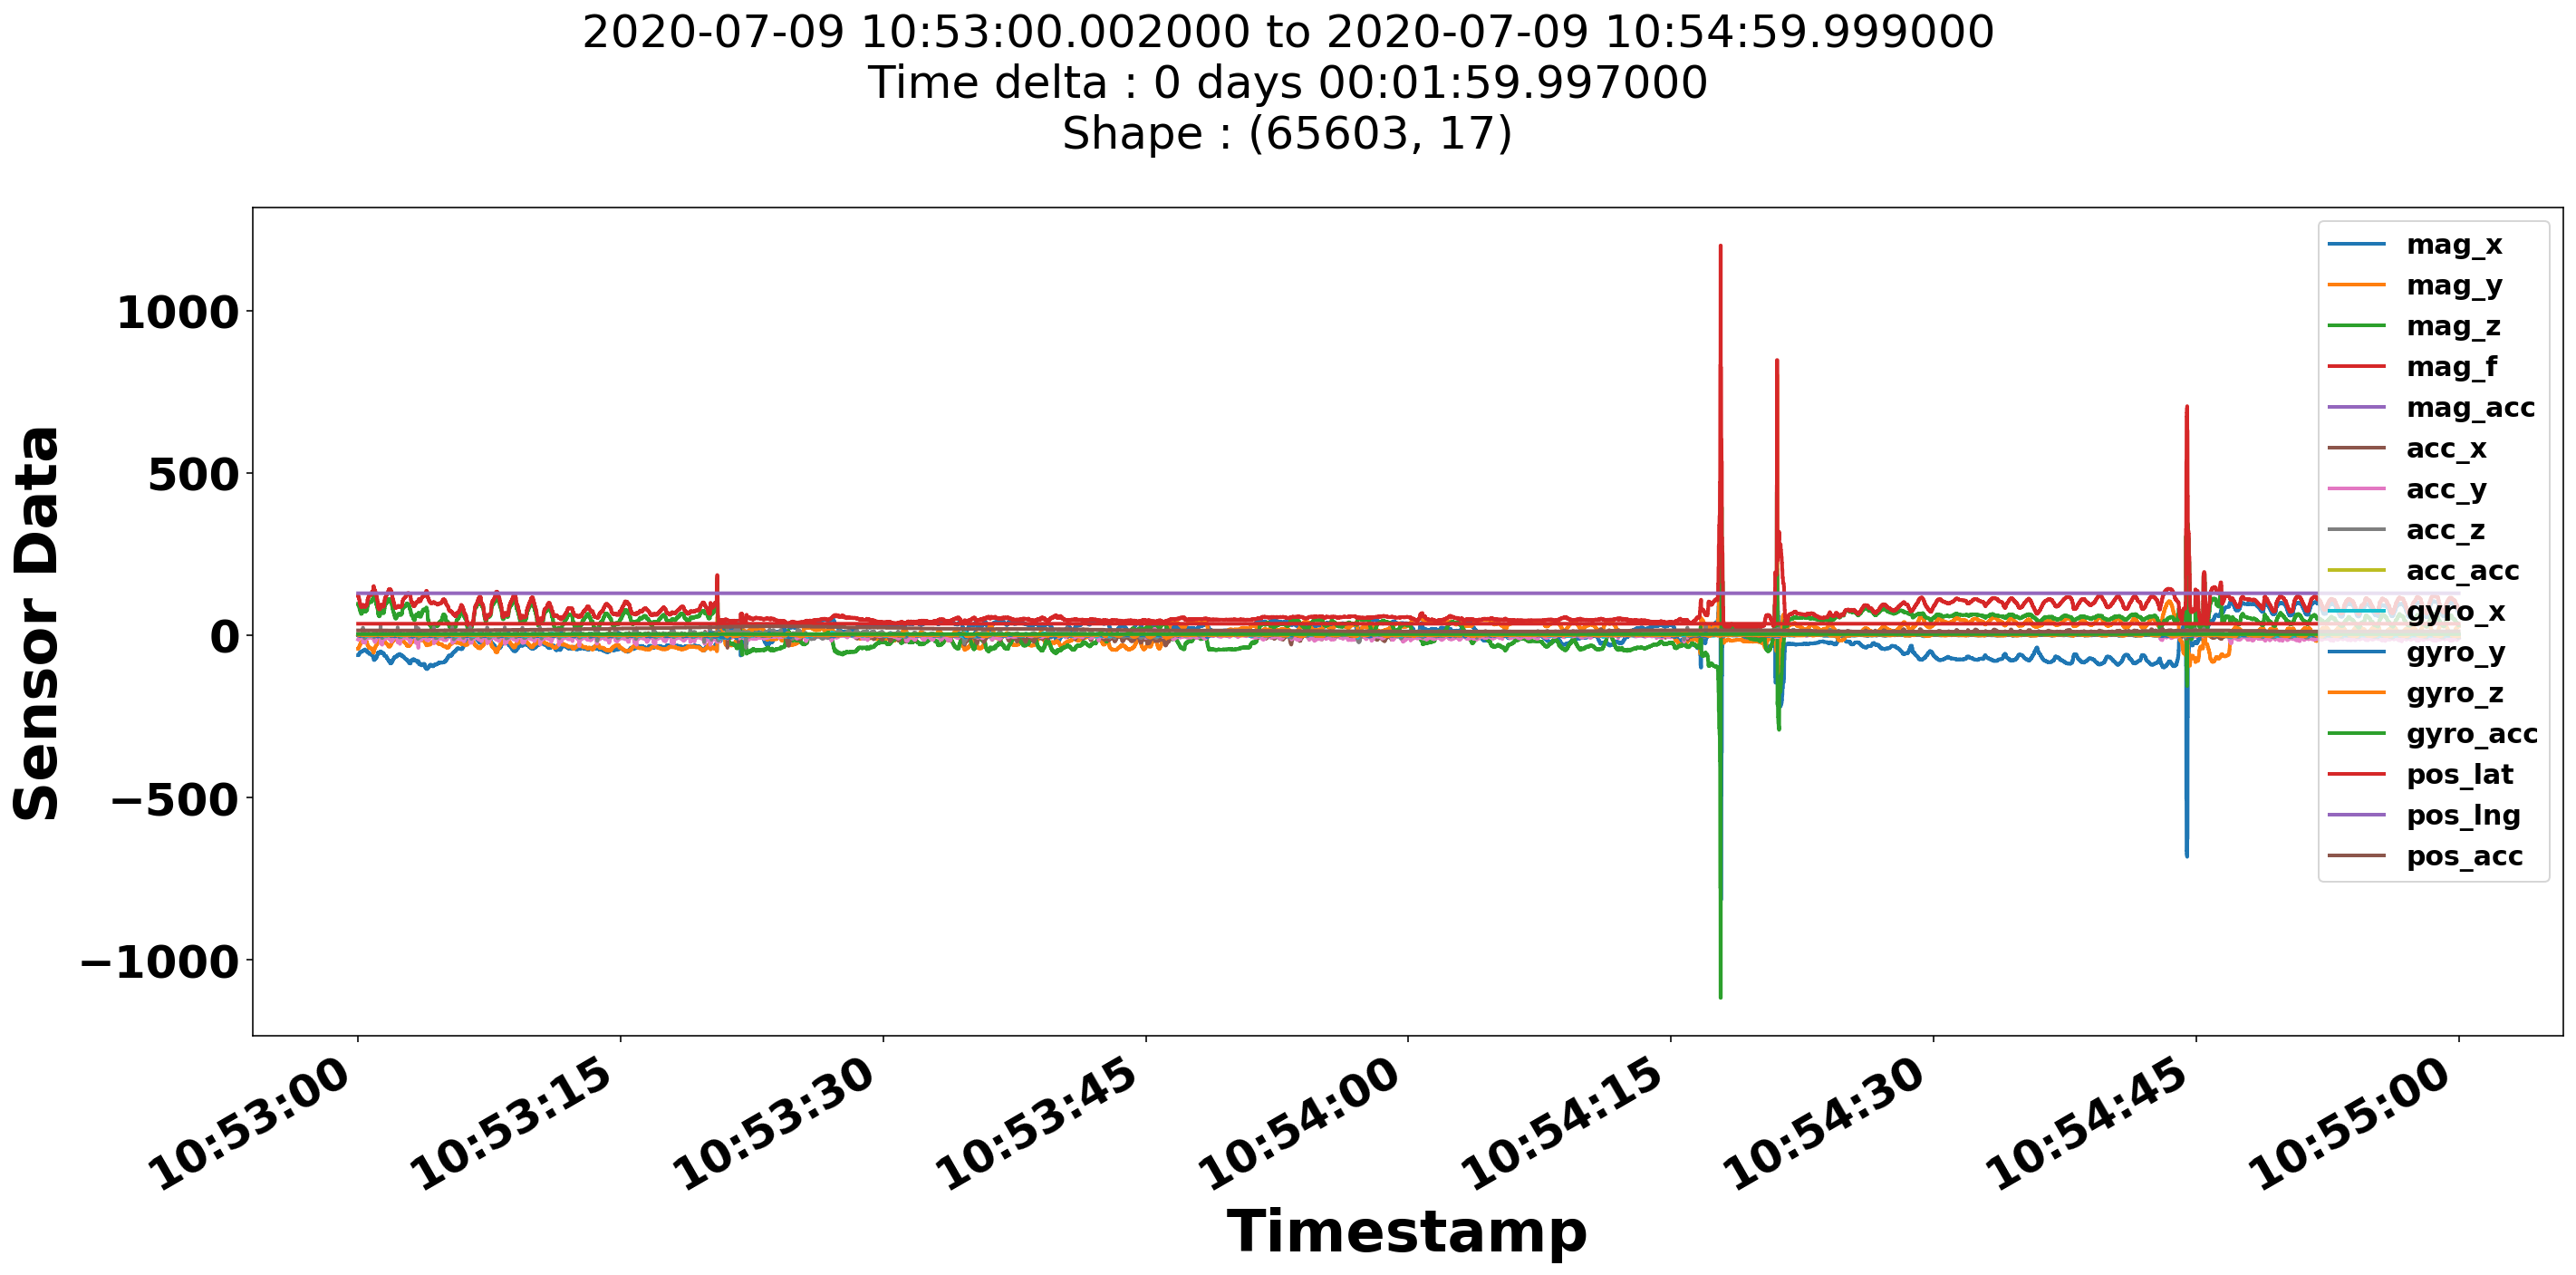

In [10]:
data_plotting.plot_data(data[0]["2020-07-09 10:53":"2020-07-09 10:54"],
                          'Timestamp', 'Sensor Data', 15, dir_name, file_name + '_st1', False)

### Second data

In [11]:
dir_name = 'F4428F5EB41D'
file_name = '20200709_195222'

Start :
 2020-07-09 10:52:26.064000
End :
 2020-07-09 11:05:40.748000
Time delta :
 0 days 00:13:14.684000
Shape :
 (432418, 17) 



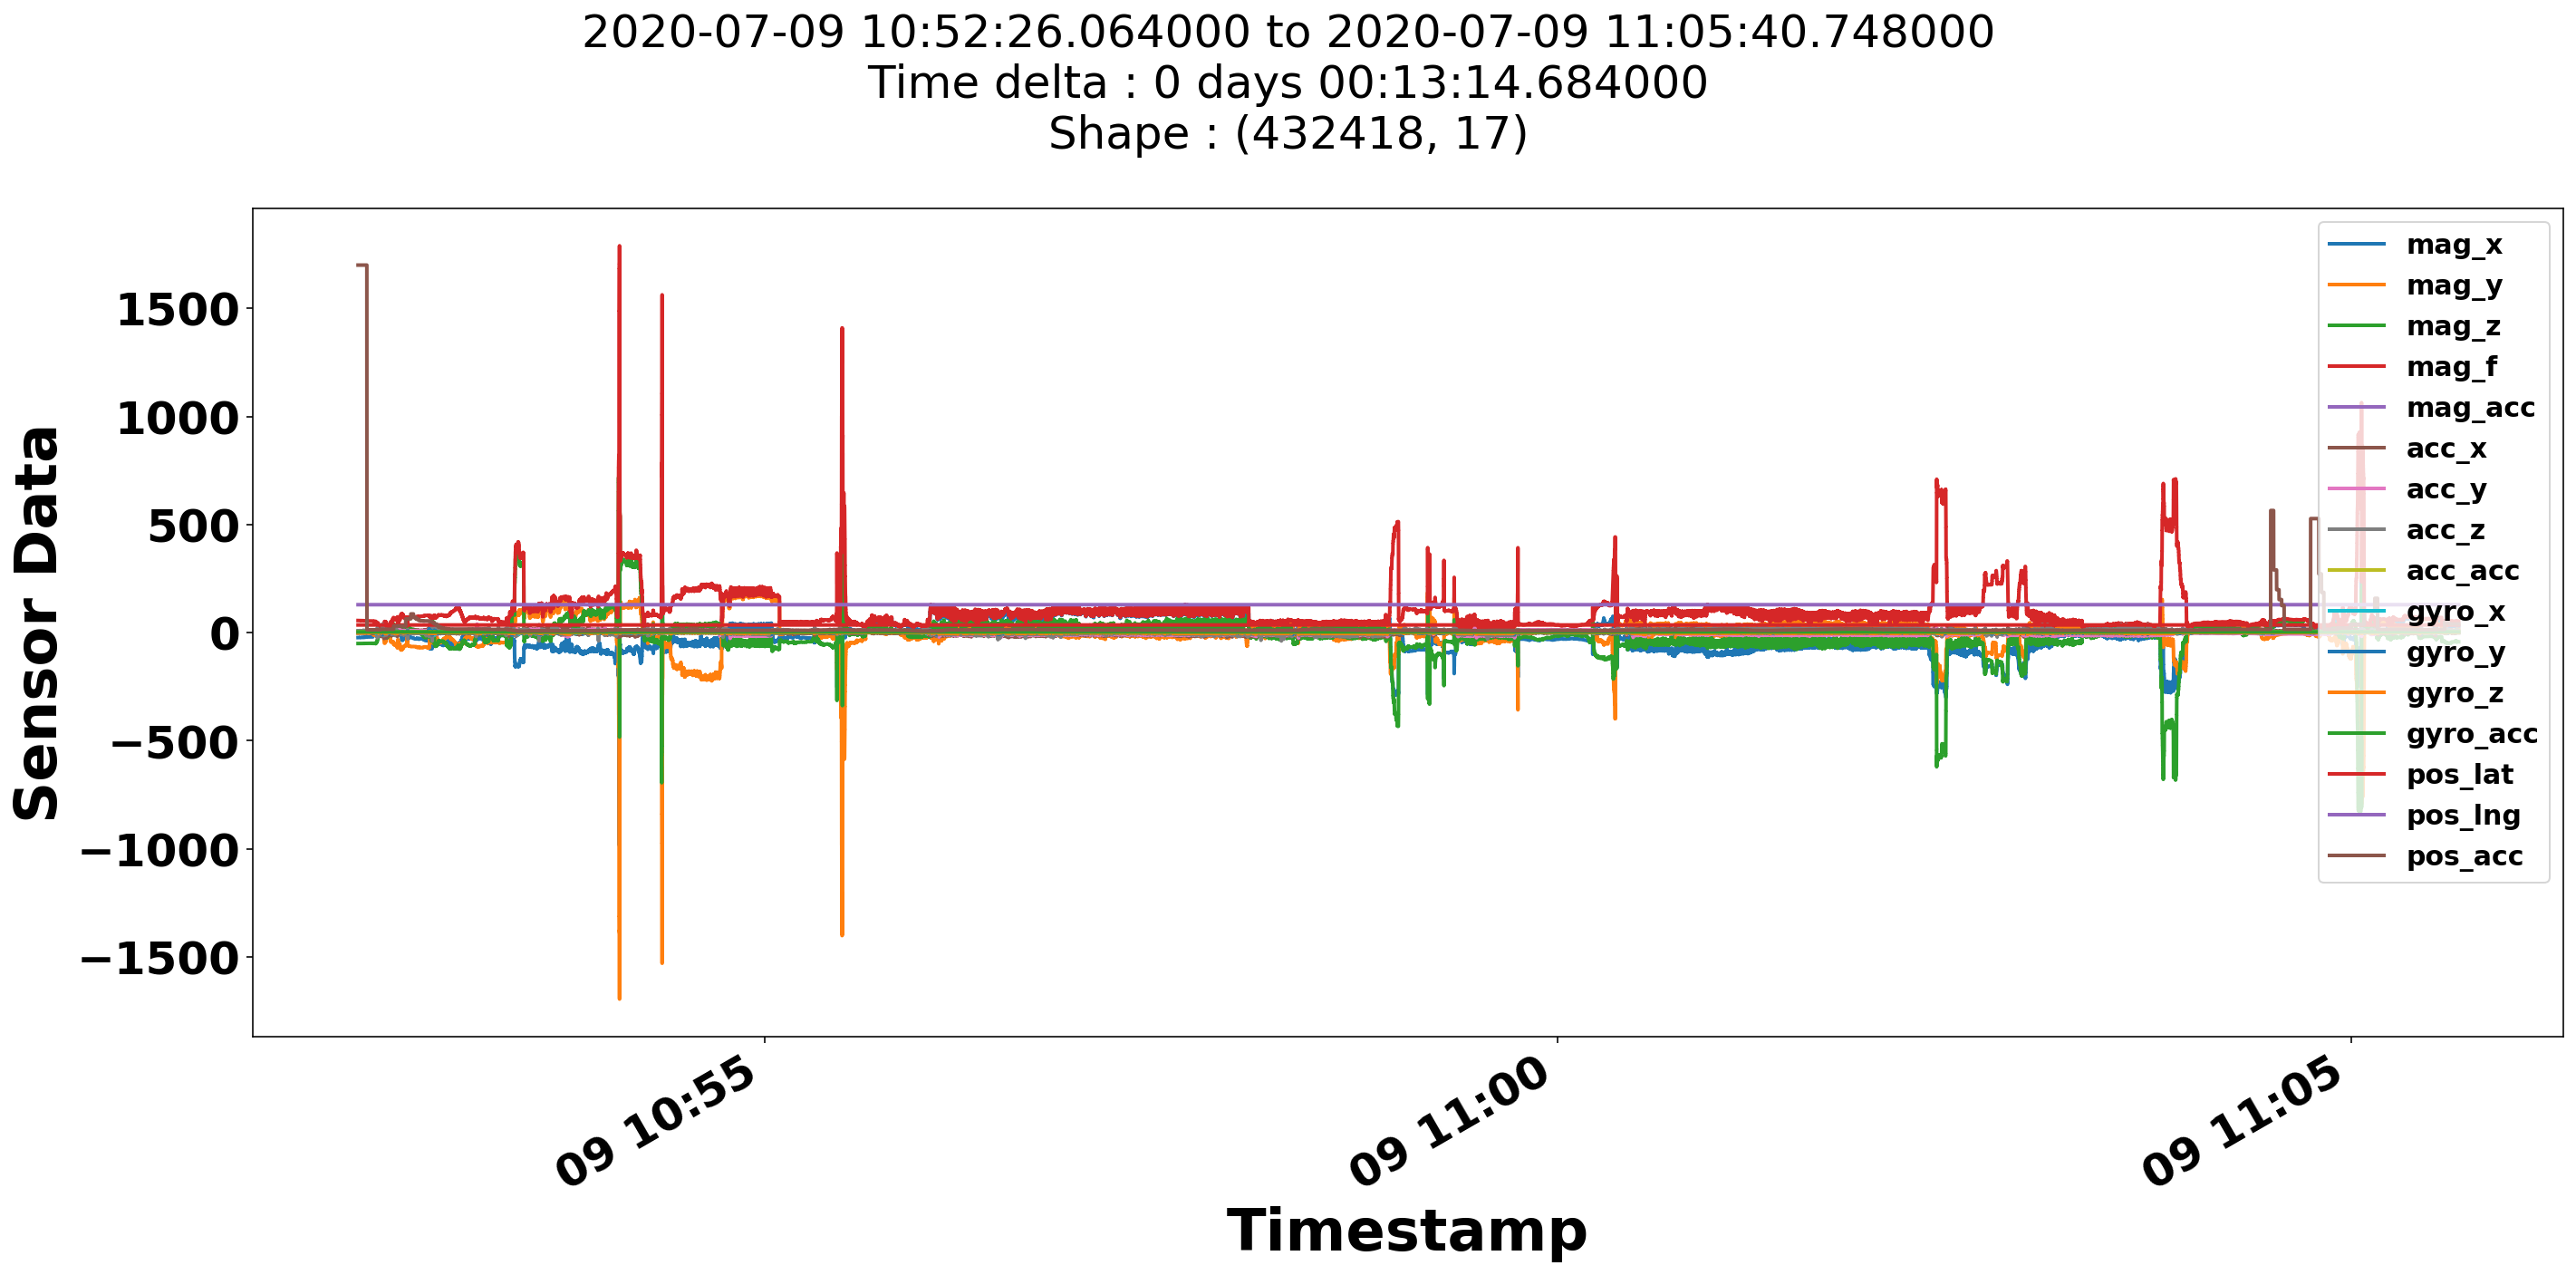

In [12]:
data_plotting.plot_data(data[1], 'Timestamp', 'Sensor Data', 15, dir_name, file_name, False)

Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:54:59.999000
Time delta :
 0 days 00:01:59.999000
Shape :
 (64720, 17) 



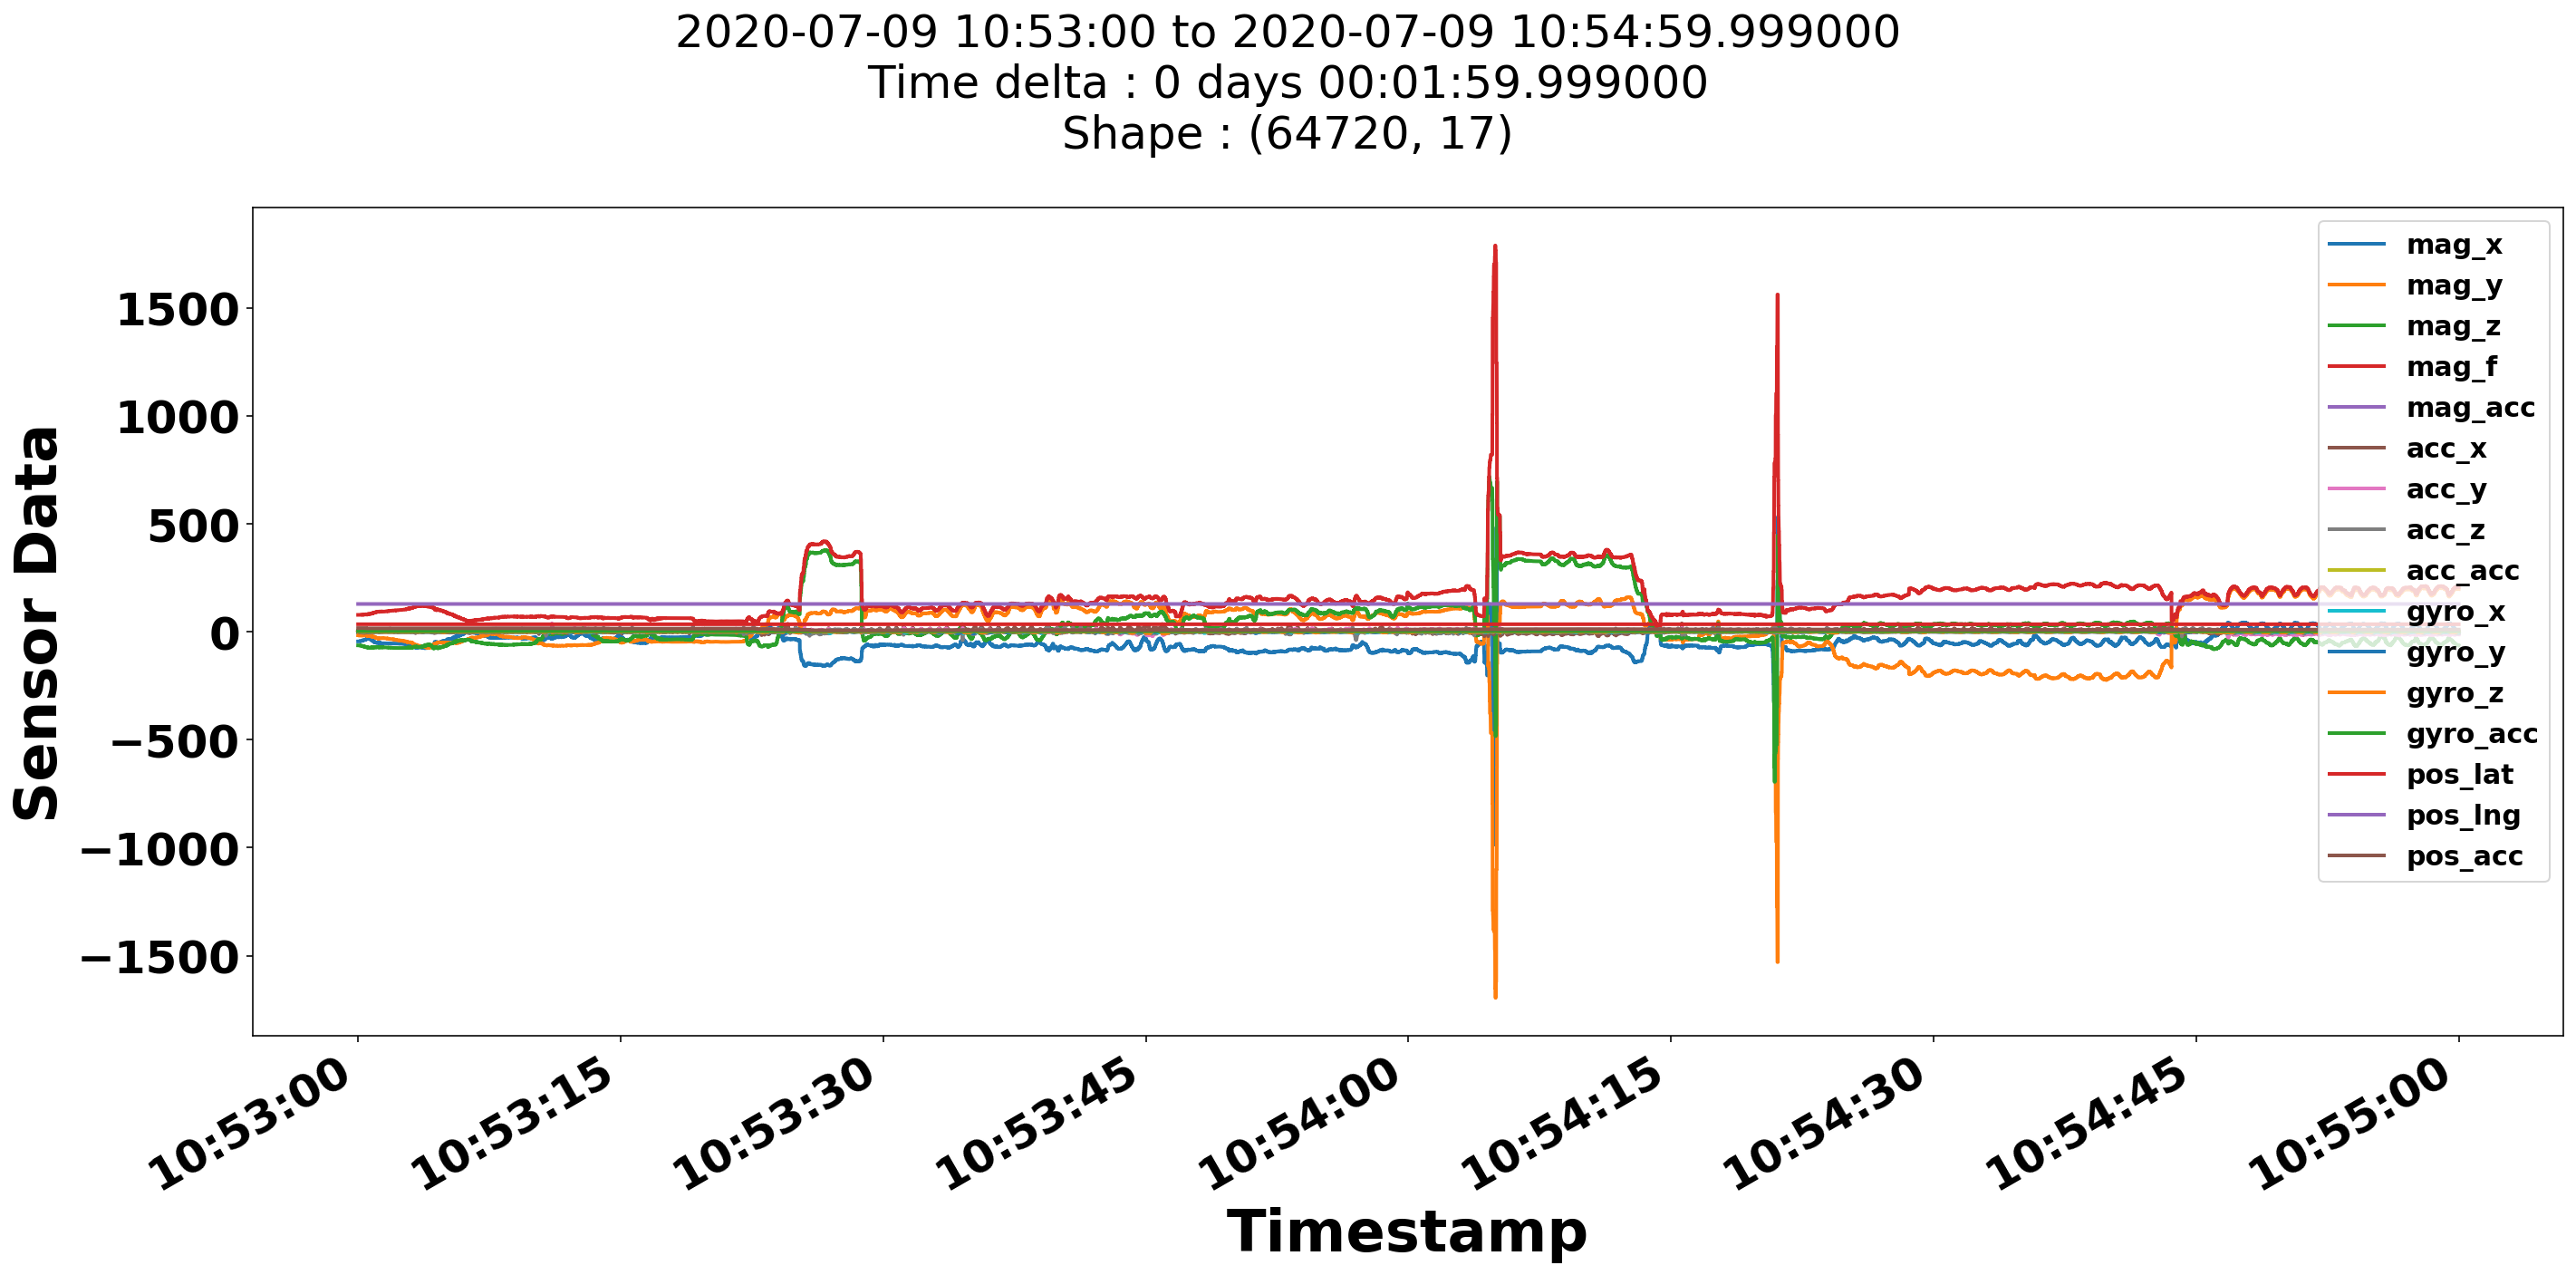

In [13]:
data_plotting.plot_data(data[1]["2020-07-09 10:53":"2020-07-09 10:54"], 
                          'Timestamp', 'Sensor Data', 15, dir_name, file_name + '_st1', False)

### Subplot

In [14]:
dir_name = 'AE_1D'
file_name = '200709-195219_195222'

Data 1 : 
Start :
 2020-07-09 10:52:26.001000
End :
 2020-07-09 11:05:40.811000
Time delta :
 0 days 00:13:14.810000
Shape :
 (442903, 17) 

Data 2 : 
Start :
 2020-07-09 10:52:26.064000
End :
 2020-07-09 11:05:40.748000
Time delta :
 0 days 00:13:14.684000
Shape :
 (432418, 17) 



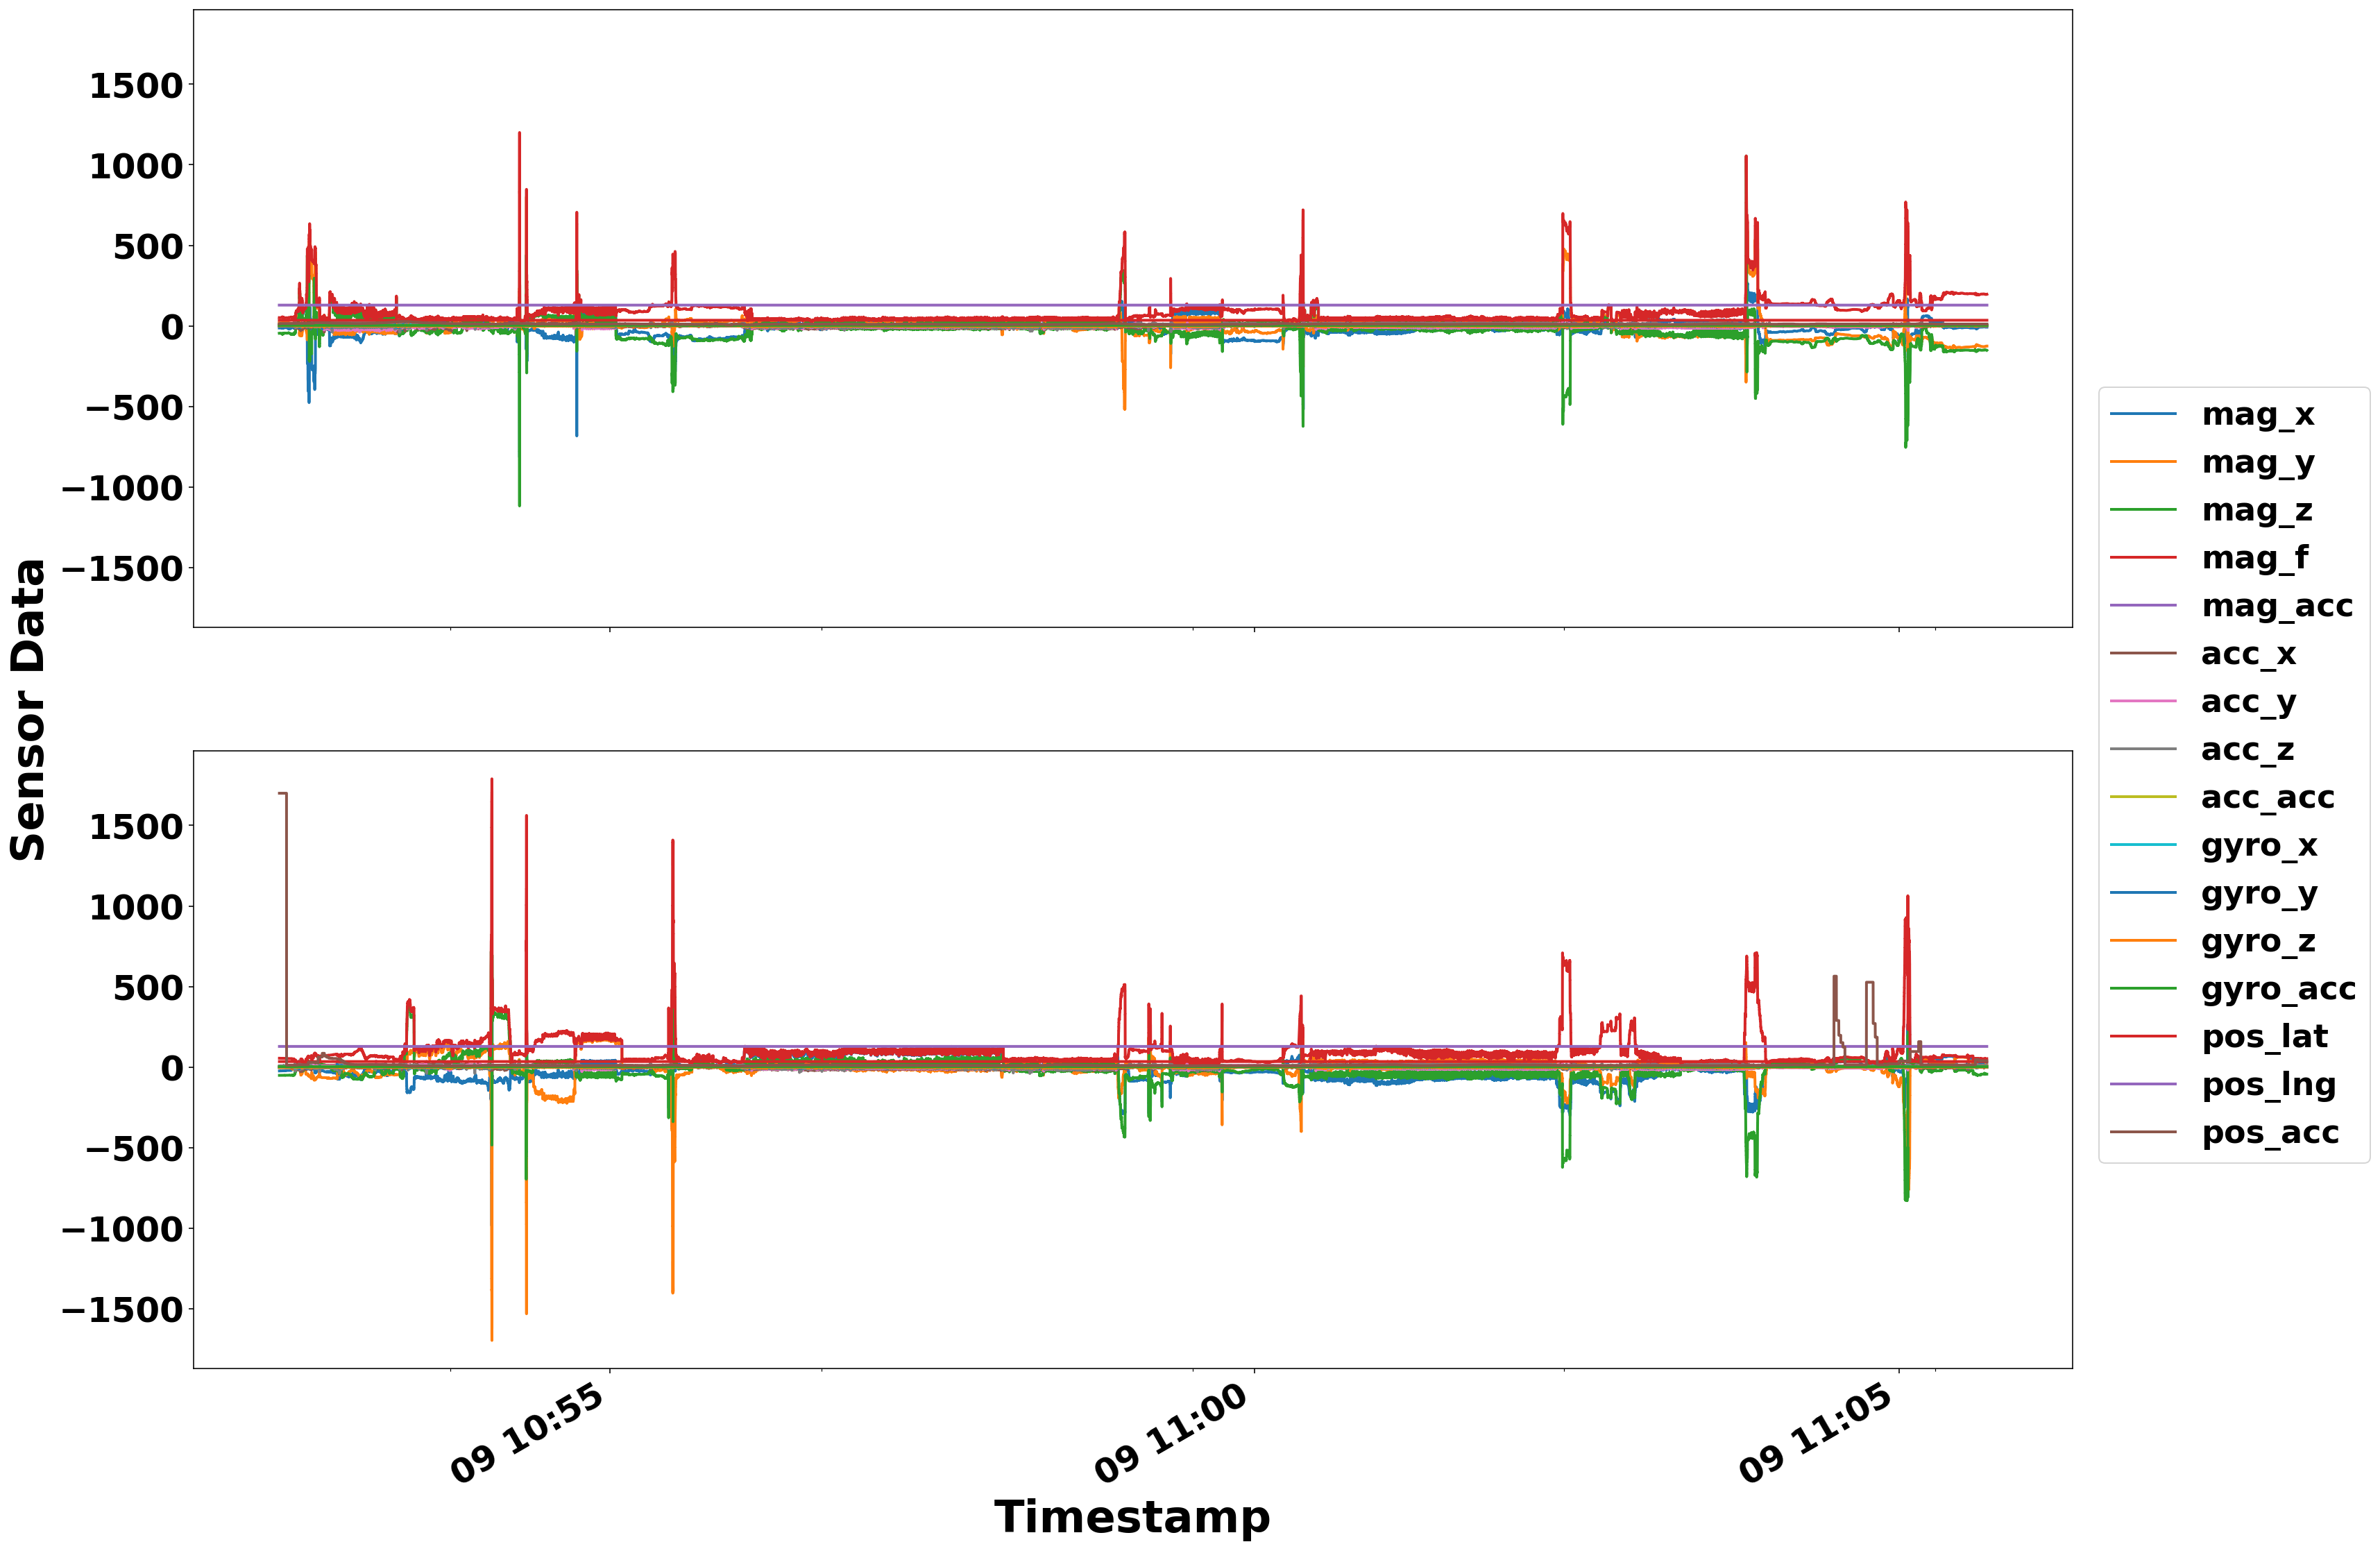

In [18]:
data_display = data[0].columns
time_from = "2020-07-09 10:52:26"
time_to = "2020-07-09 11:05:40"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.877), 27, (25, 20),
                             dir_name, file_name, False)

Data 1 : 
Start :
 2020-07-09 10:53:00.002000
End :
 2020-07-09 10:55:00.999000
Time delta :
 0 days 00:02:00.997000
Shape :
 (66134, 17) 

Data 2 : 
Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:55:00.999000
Time delta :
 0 days 00:02:00.999000
Shape :
 (65221, 17) 



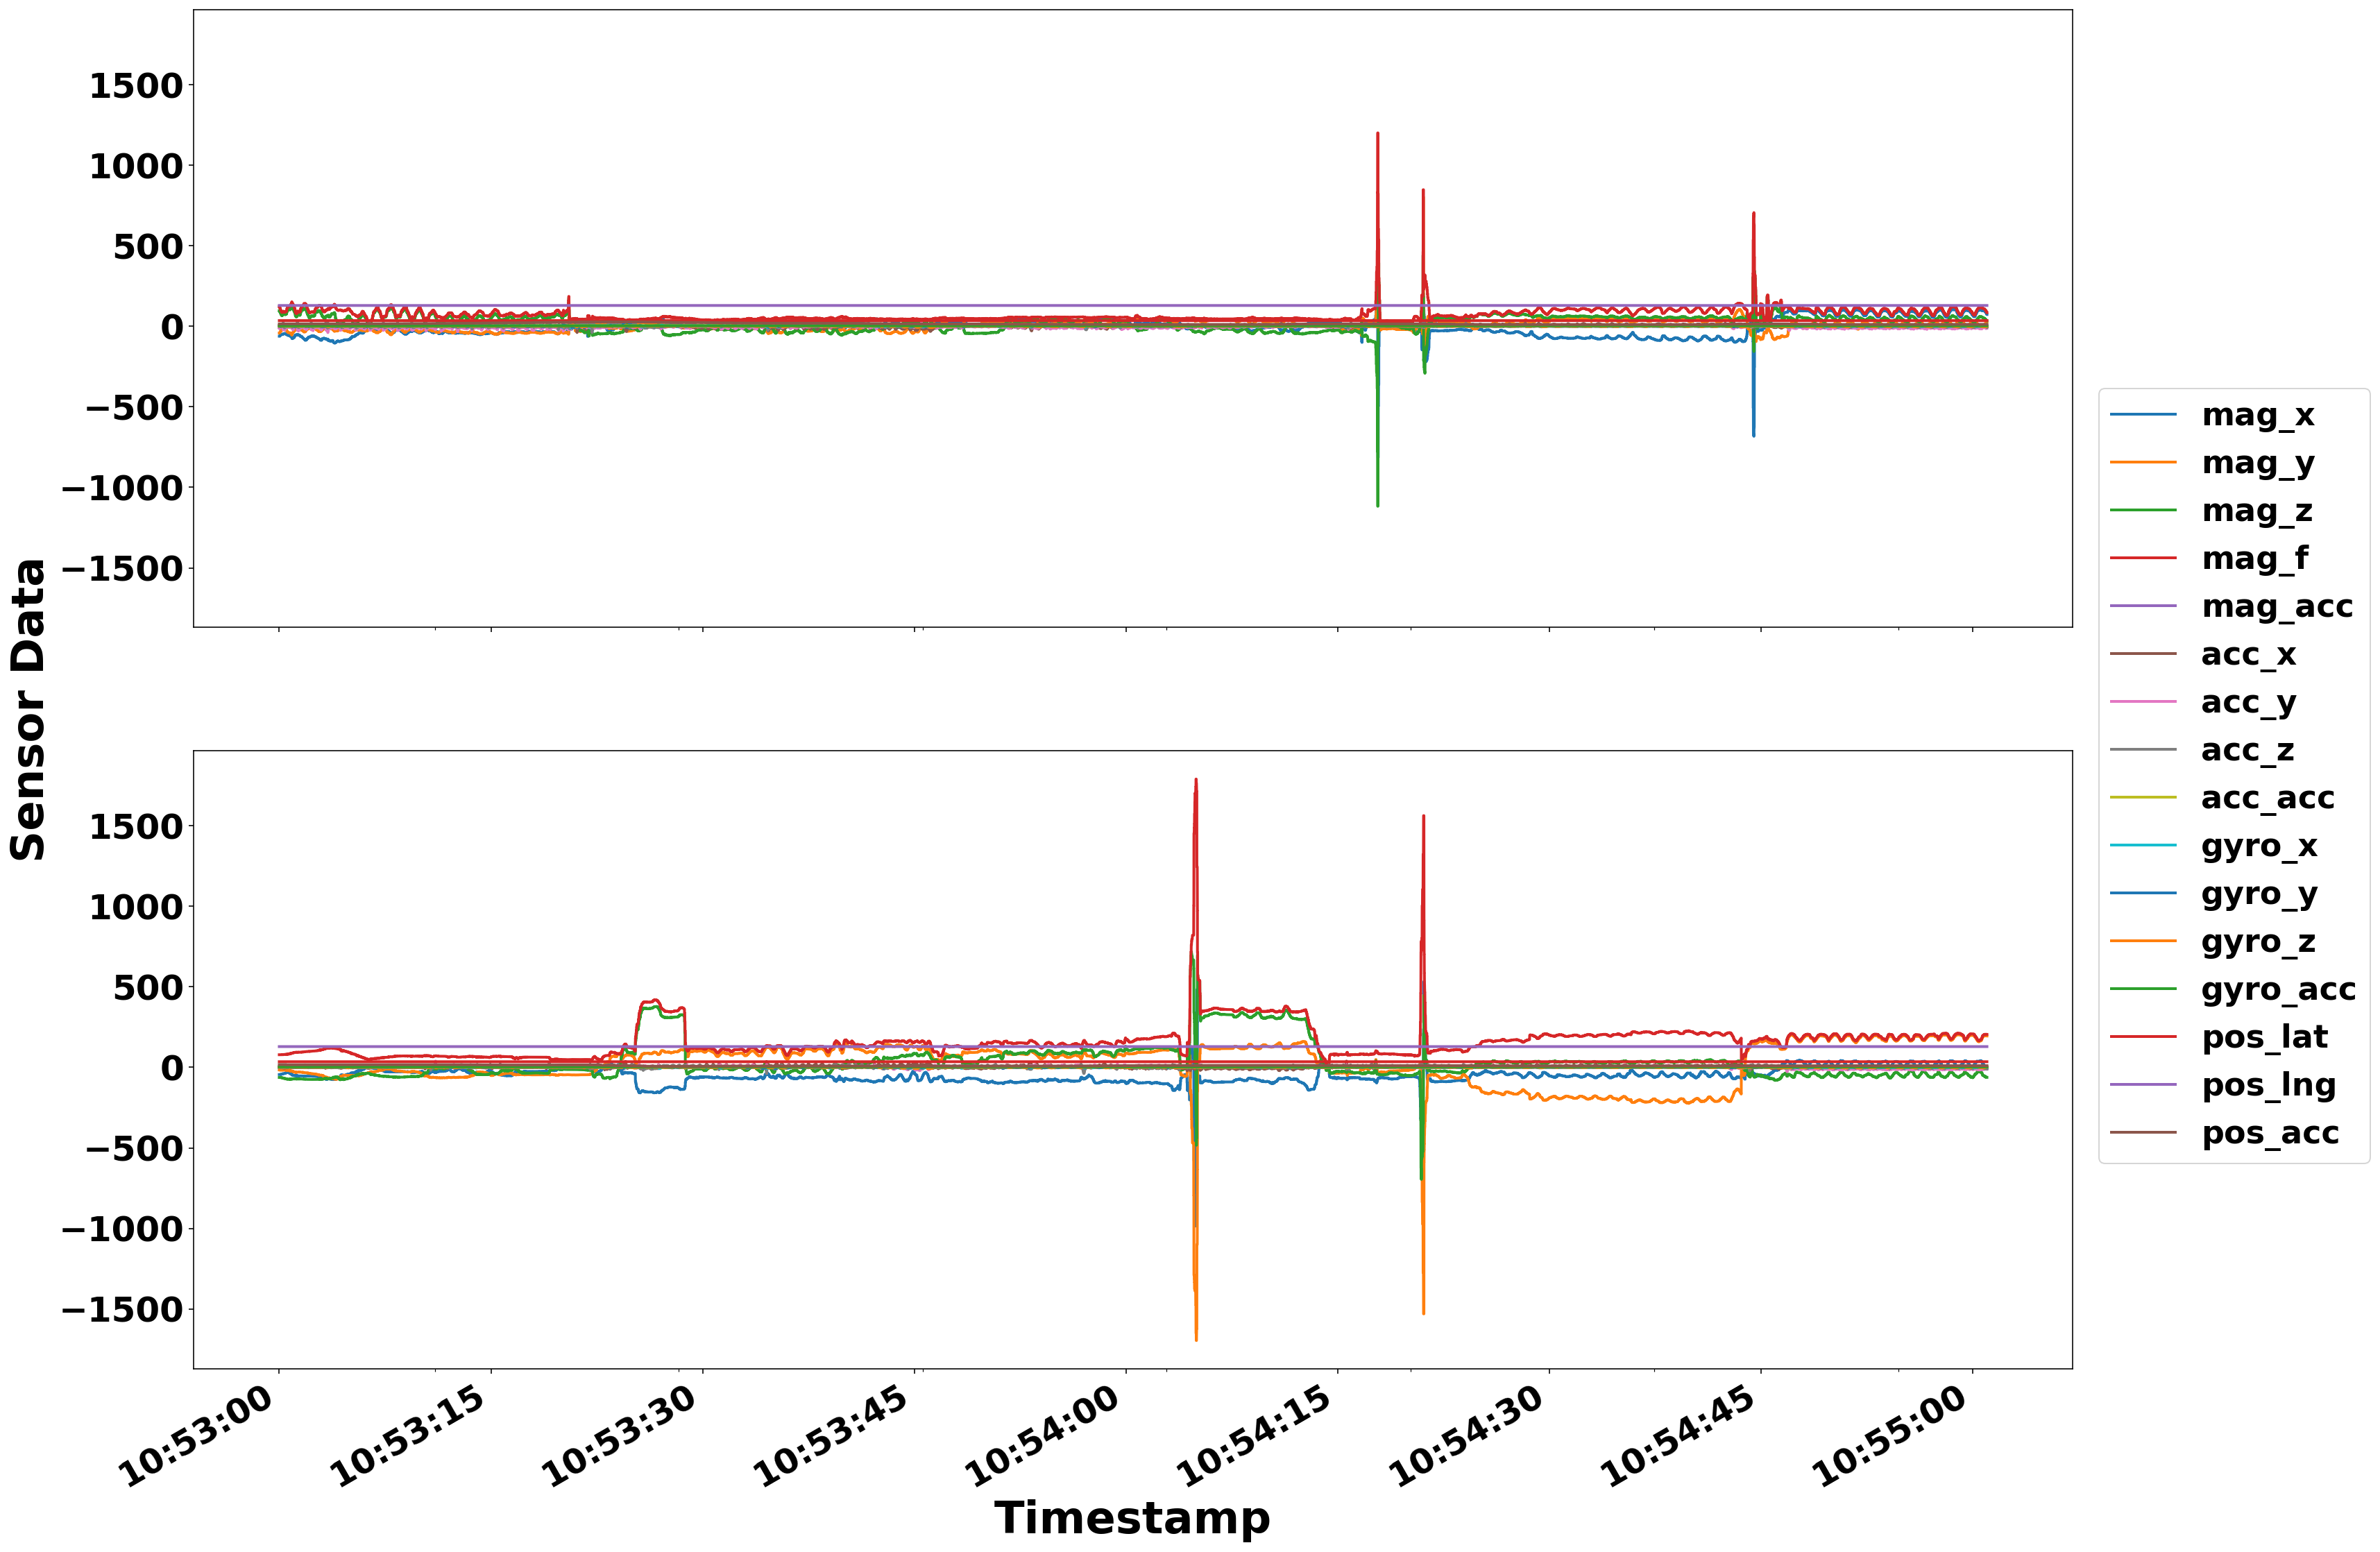

In [19]:
data_display = data[0].columns
time_from = "2020-07-09 10:53:00"
time_to = "2020-07-09 10:55:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.877), 27, (25, 20),
                             dir_name, file_name + '_st_1', False)

Data 1 : 
Start :
 2020-07-09 10:53:00.002000
End :
 2020-07-09 10:55:00.999000
Time delta :
 0 days 00:02:00.997000
Shape :
 (66134, 4) 

Data 2 : 
Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:55:00.999000
Time delta :
 0 days 00:02:00.999000
Shape :
 (65221, 4) 



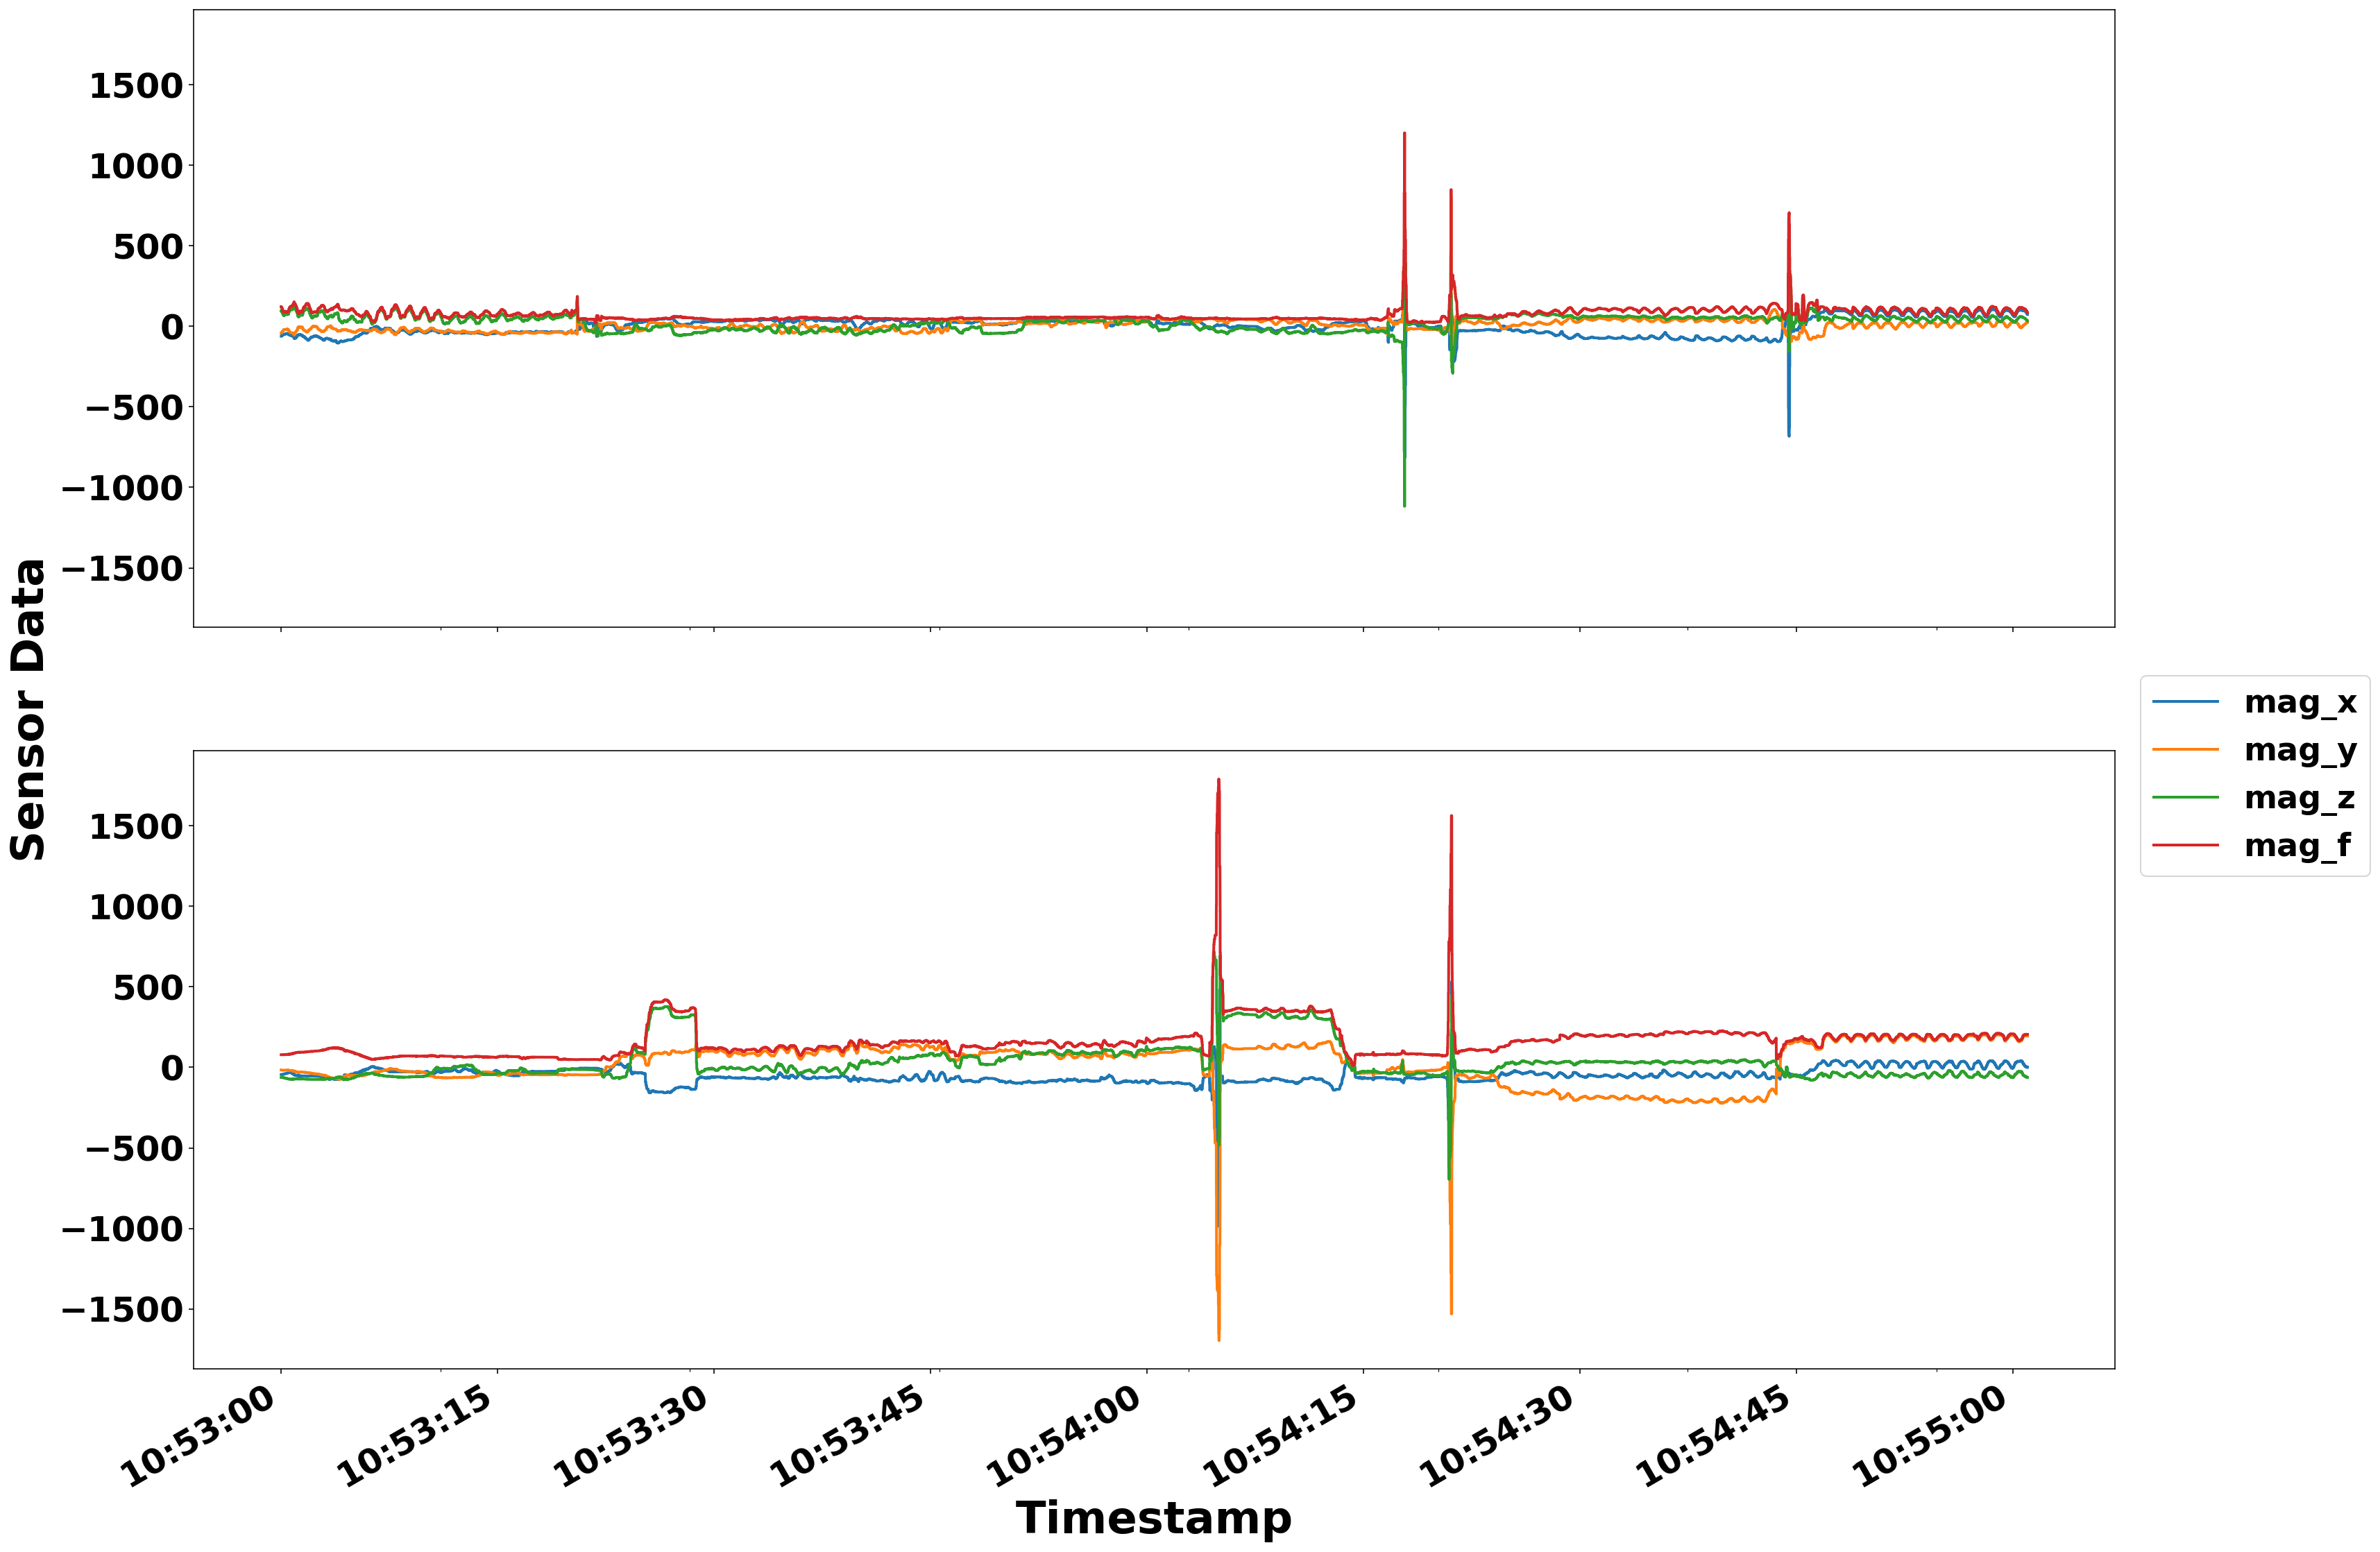

In [27]:
data_display = ['mag_x','mag_y','mag_z','mag_f']
time_from = "2020-07-09 10:53:00"
time_to = "2020-07-09 10:55:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.894), 27, (25, 20),
                             dir_name, file_name + '_st_2', False)

Data 1 : 
Start :
 2020-07-09 10:53:00.002000
End :
 2020-07-09 10:55:00.999000
Time delta :
 0 days 00:02:00.997000
Shape :
 (66134, 1) 

Data 2 : 
Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:55:00.999000
Time delta :
 0 days 00:02:00.999000
Shape :
 (65221, 1) 



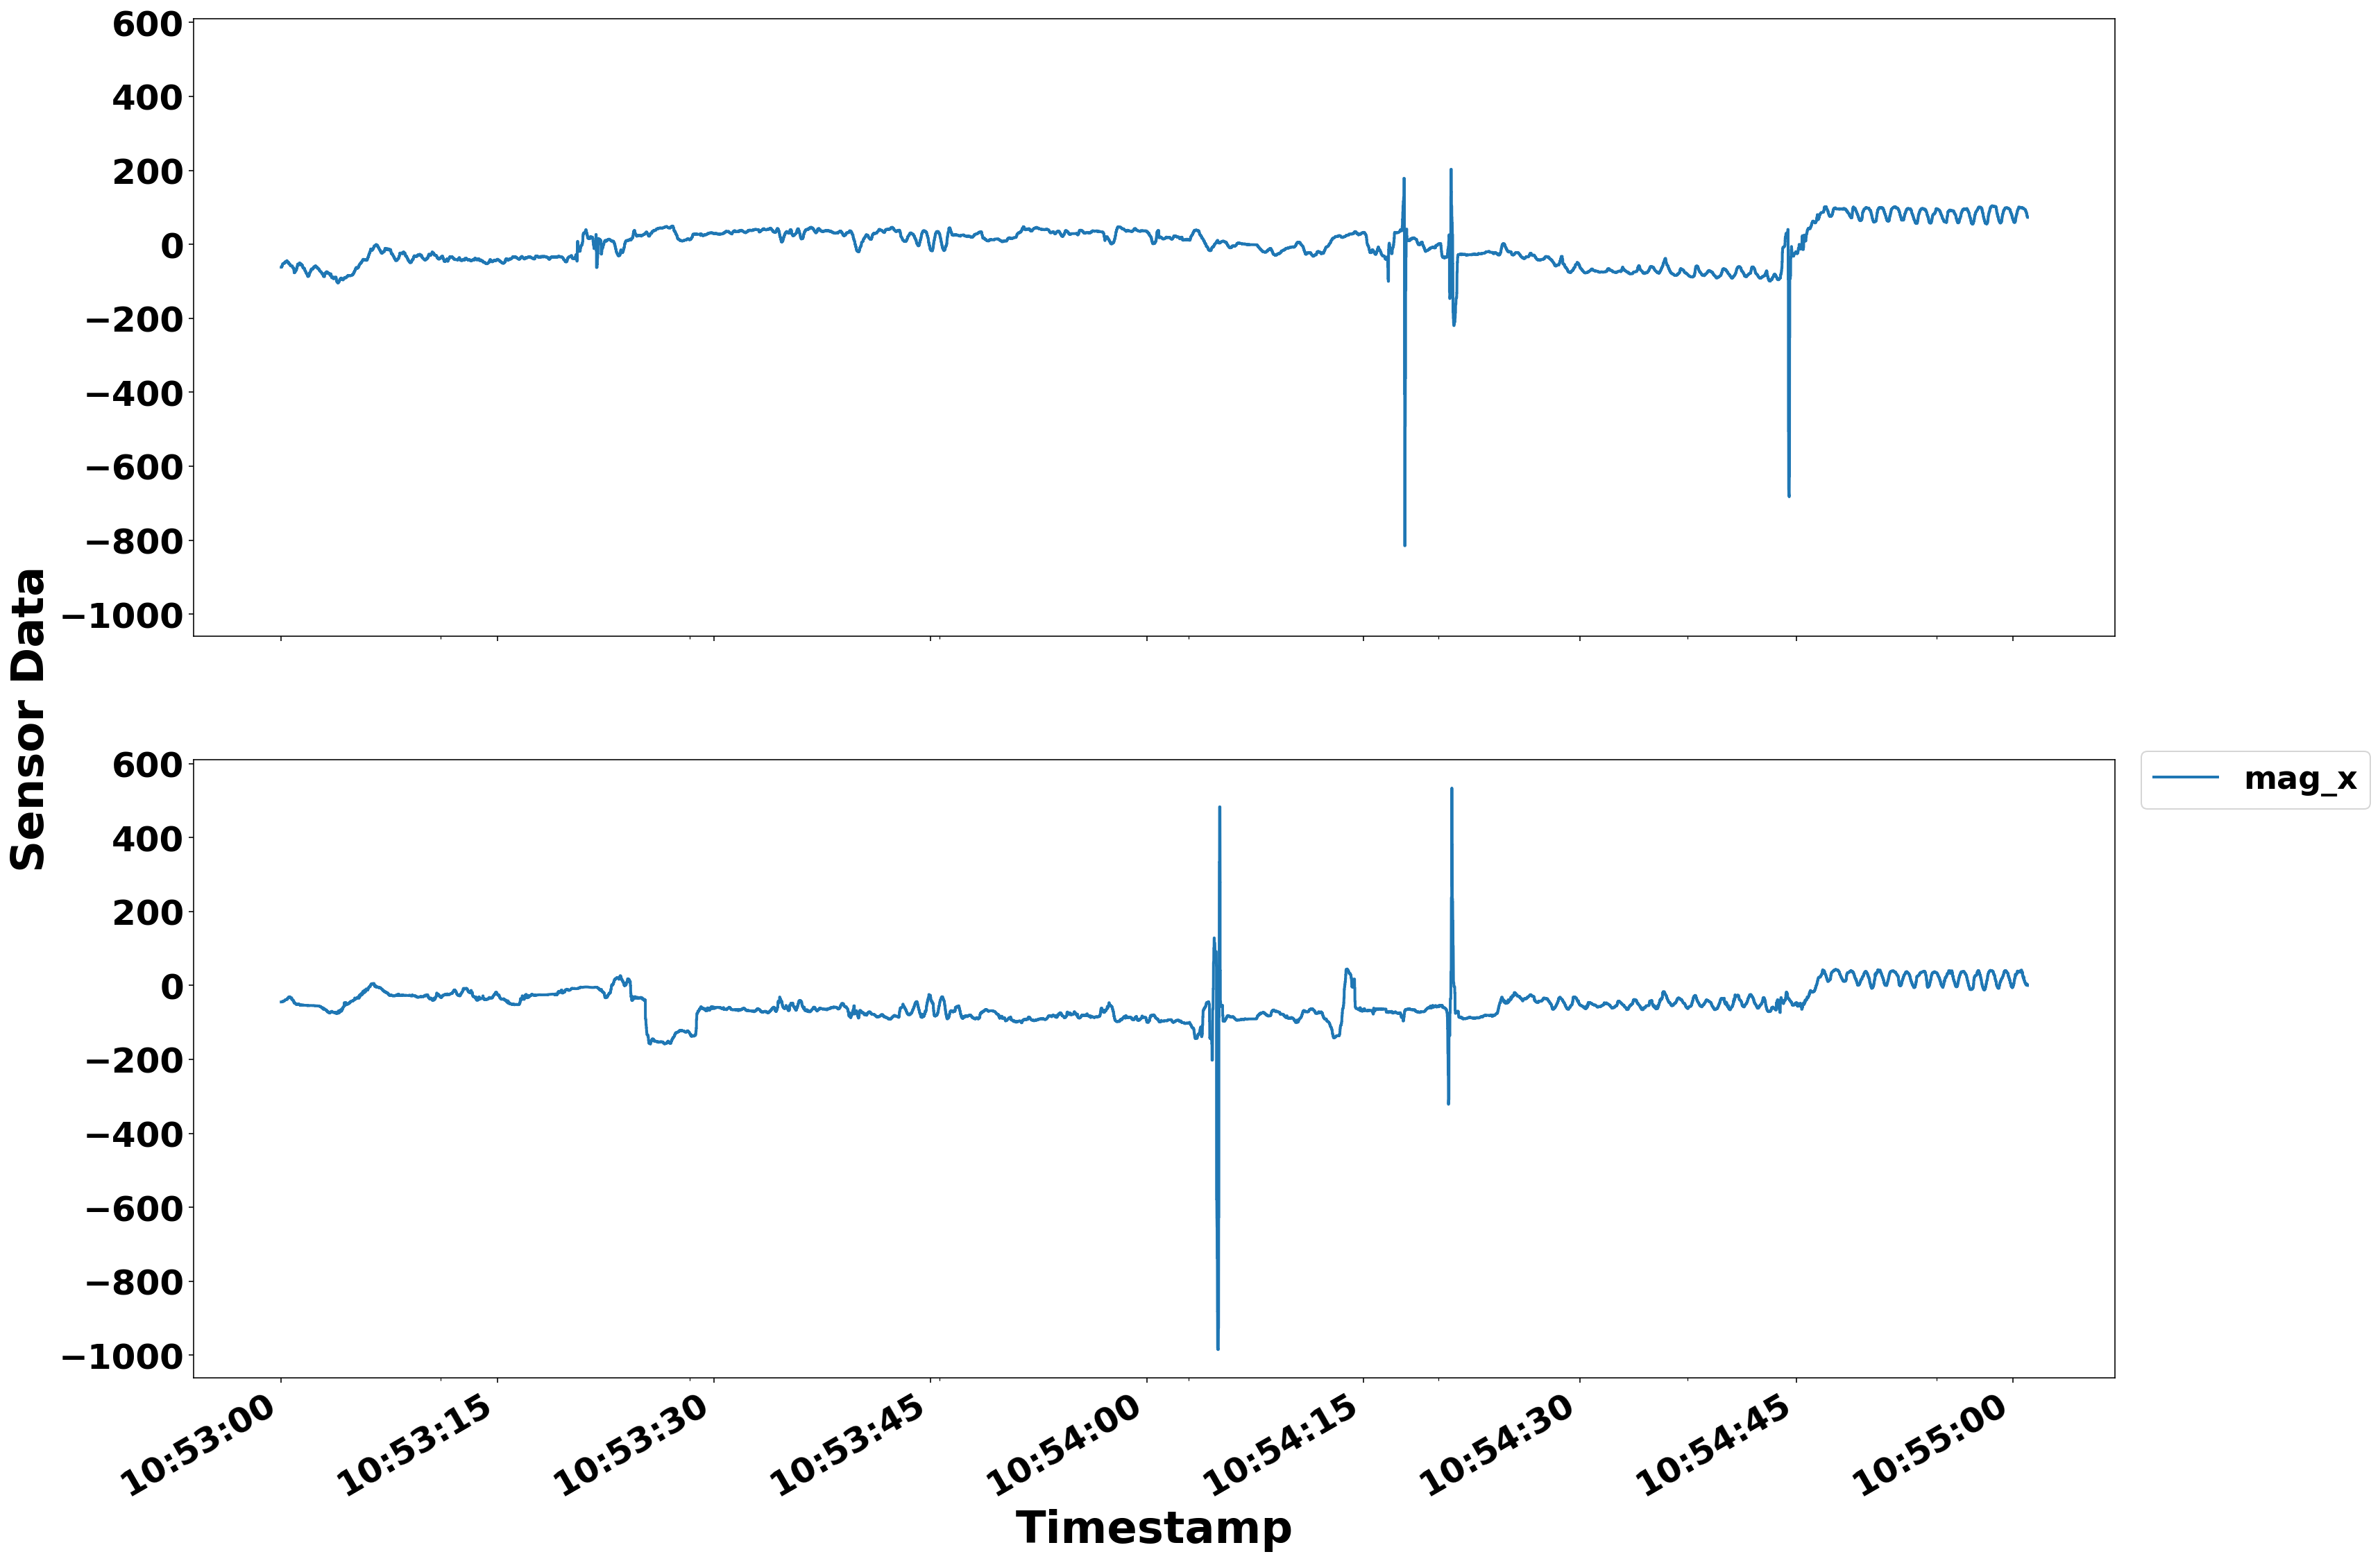

In [28]:
data_display = ['mag_x']
time_from = "2020-07-09 10:53:00"
time_to = "2020-07-09 10:55:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.894), 27, (25, 20),
                             dir_name, file_name + '_st_3x', False)

Data 1 : 
Start :
 2020-07-09 10:53:00.002000
End :
 2020-07-09 10:55:00.999000
Time delta :
 0 days 00:02:00.997000
Shape :
 (66134, 1) 

Data 2 : 
Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:55:00.999000
Time delta :
 0 days 00:02:00.999000
Shape :
 (65221, 1) 



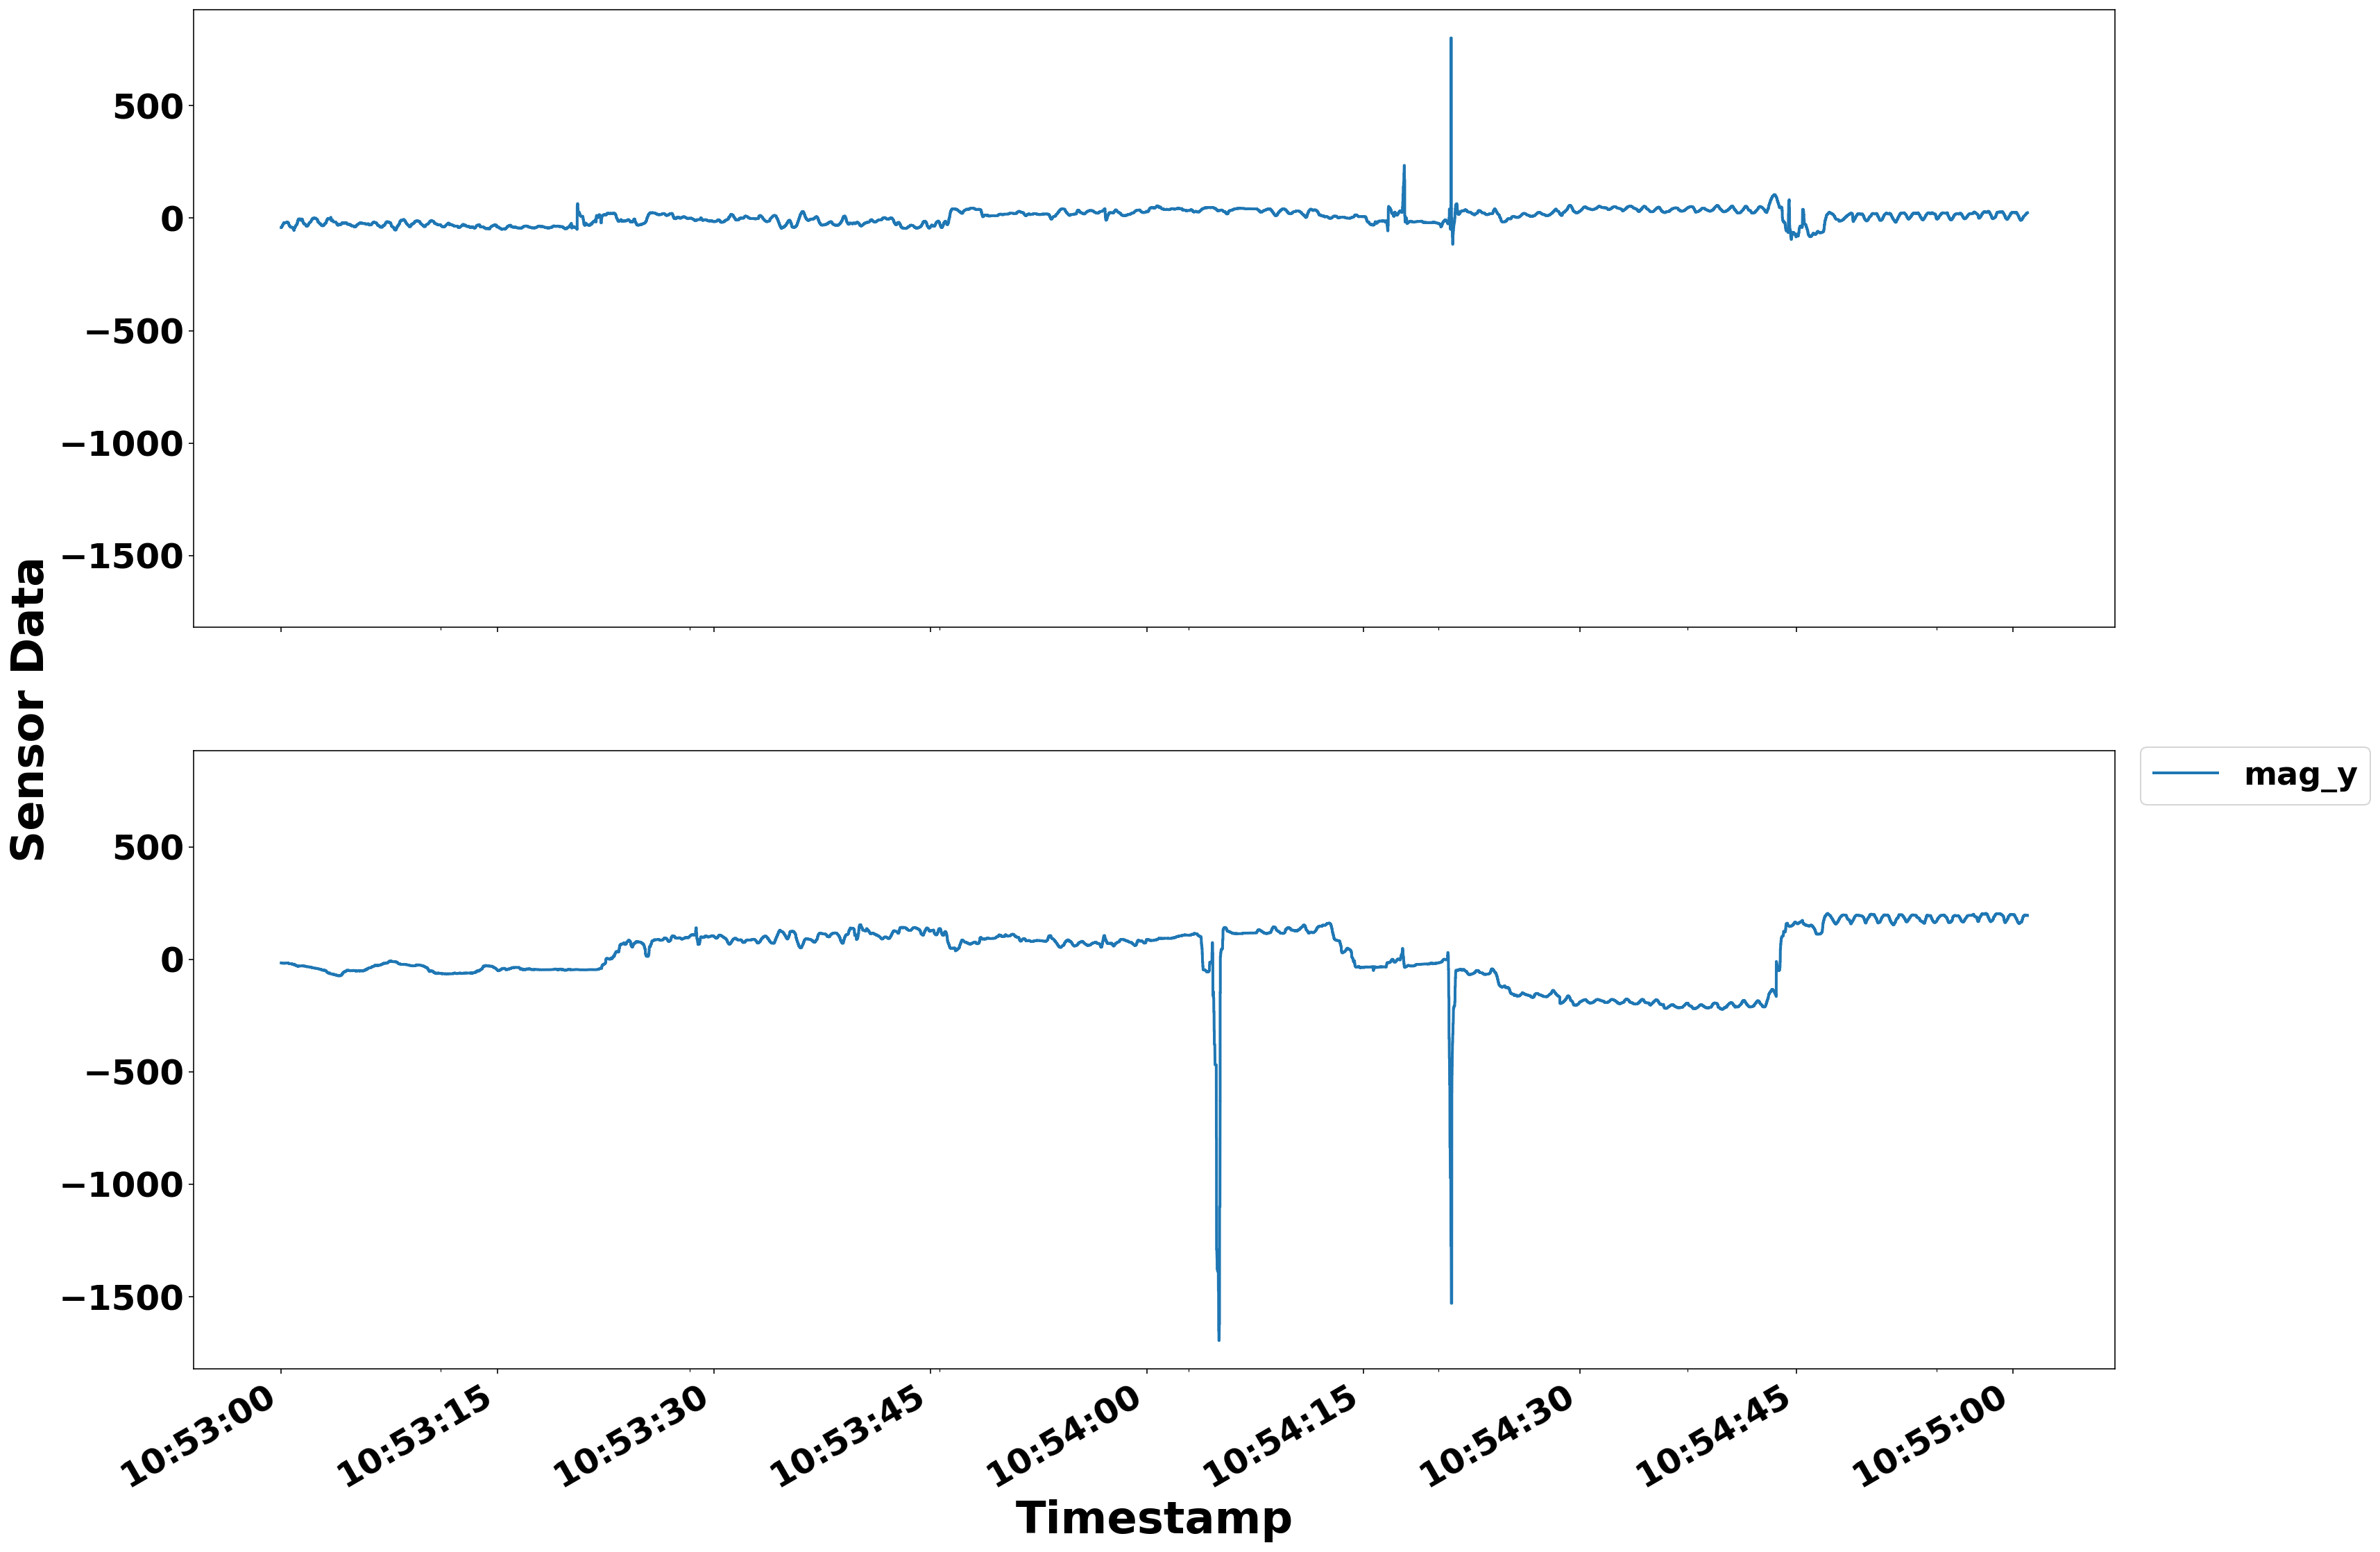

In [29]:
data_display = ['mag_y']
time_from = "2020-07-09 10:53:00"
time_to = "2020-07-09 10:55:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.894), 27, (25, 20),
                             dir_name, file_name + '_st_3y', False)

Data 1 : 
Start :
 2020-07-09 10:53:00.002000
End :
 2020-07-09 10:55:00.999000
Time delta :
 0 days 00:02:00.997000
Shape :
 (66134, 1) 

Data 2 : 
Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:55:00.999000
Time delta :
 0 days 00:02:00.999000
Shape :
 (65221, 1) 



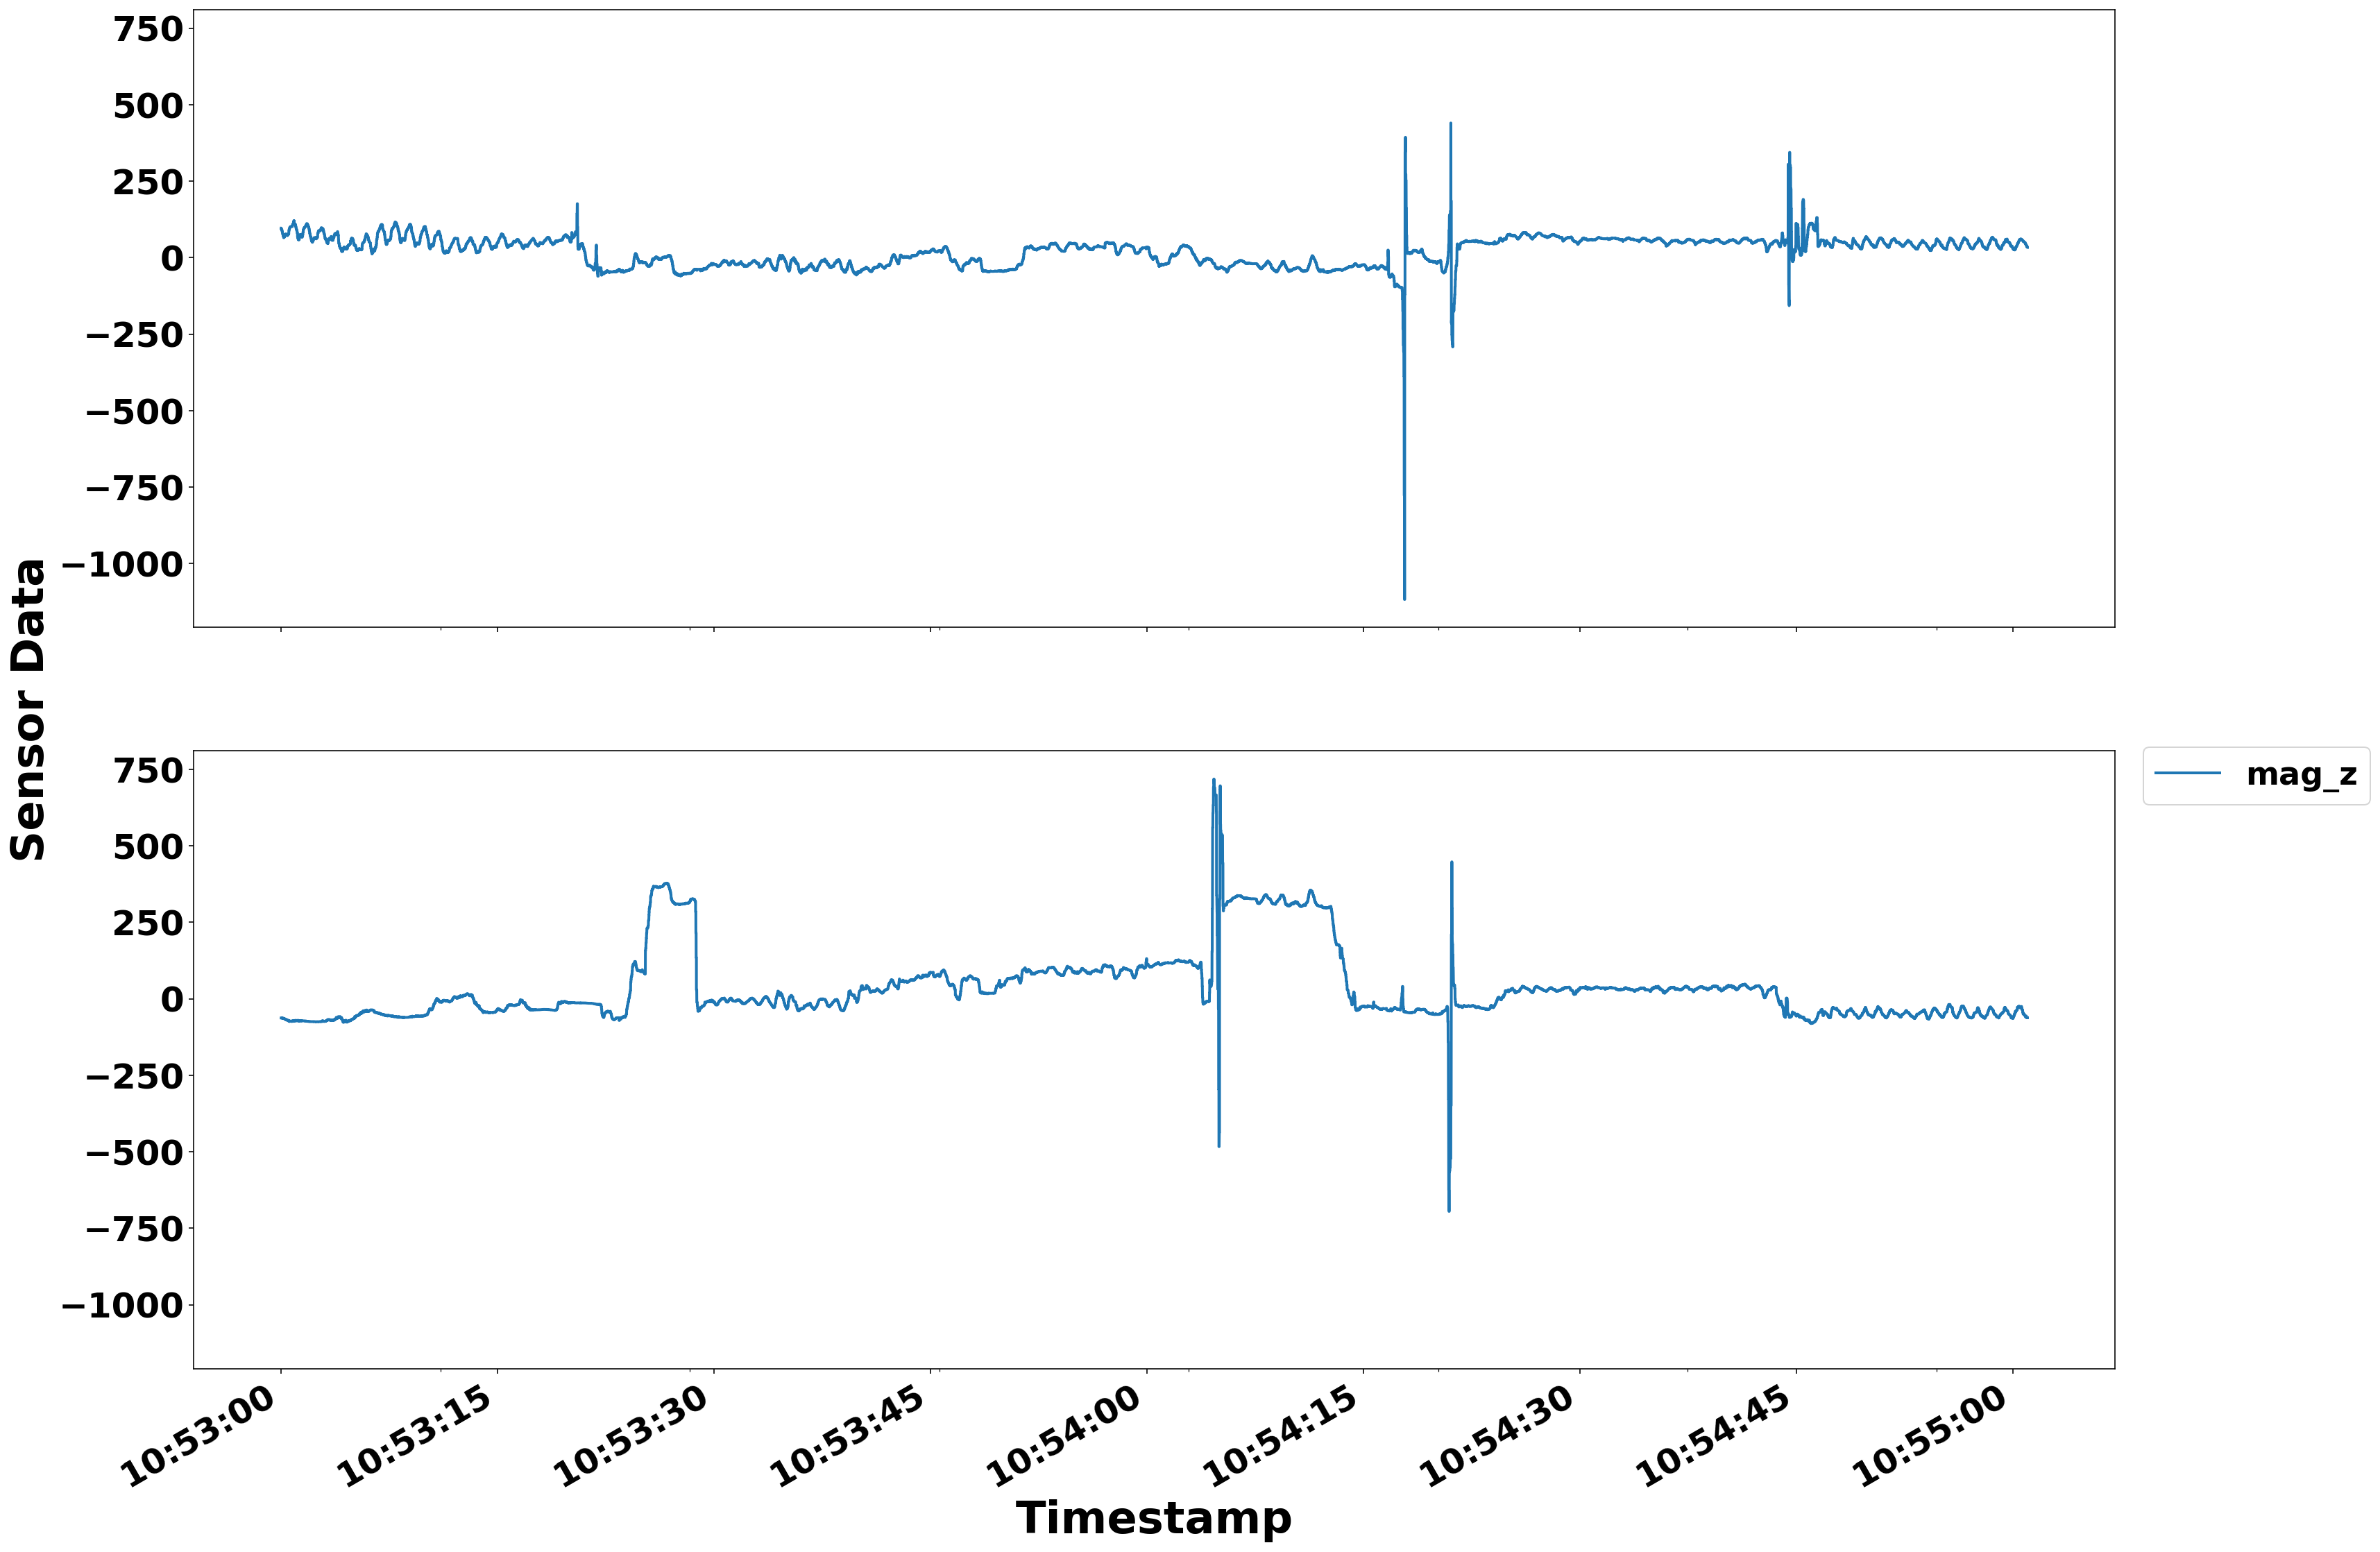

In [30]:
data_display = ['mag_z']
time_from = "2020-07-09 10:53:00"
time_to = "2020-07-09 10:55:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.894), 27, (25, 20),
                             dir_name, file_name + '_st_3z', False)

Data 1 : 
Start :
 2020-07-09 10:53:00.002000
End :
 2020-07-09 10:55:00.999000
Time delta :
 0 days 00:02:00.997000
Shape :
 (66134, 1) 

Data 2 : 
Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:55:00.999000
Time delta :
 0 days 00:02:00.999000
Shape :
 (65221, 1) 



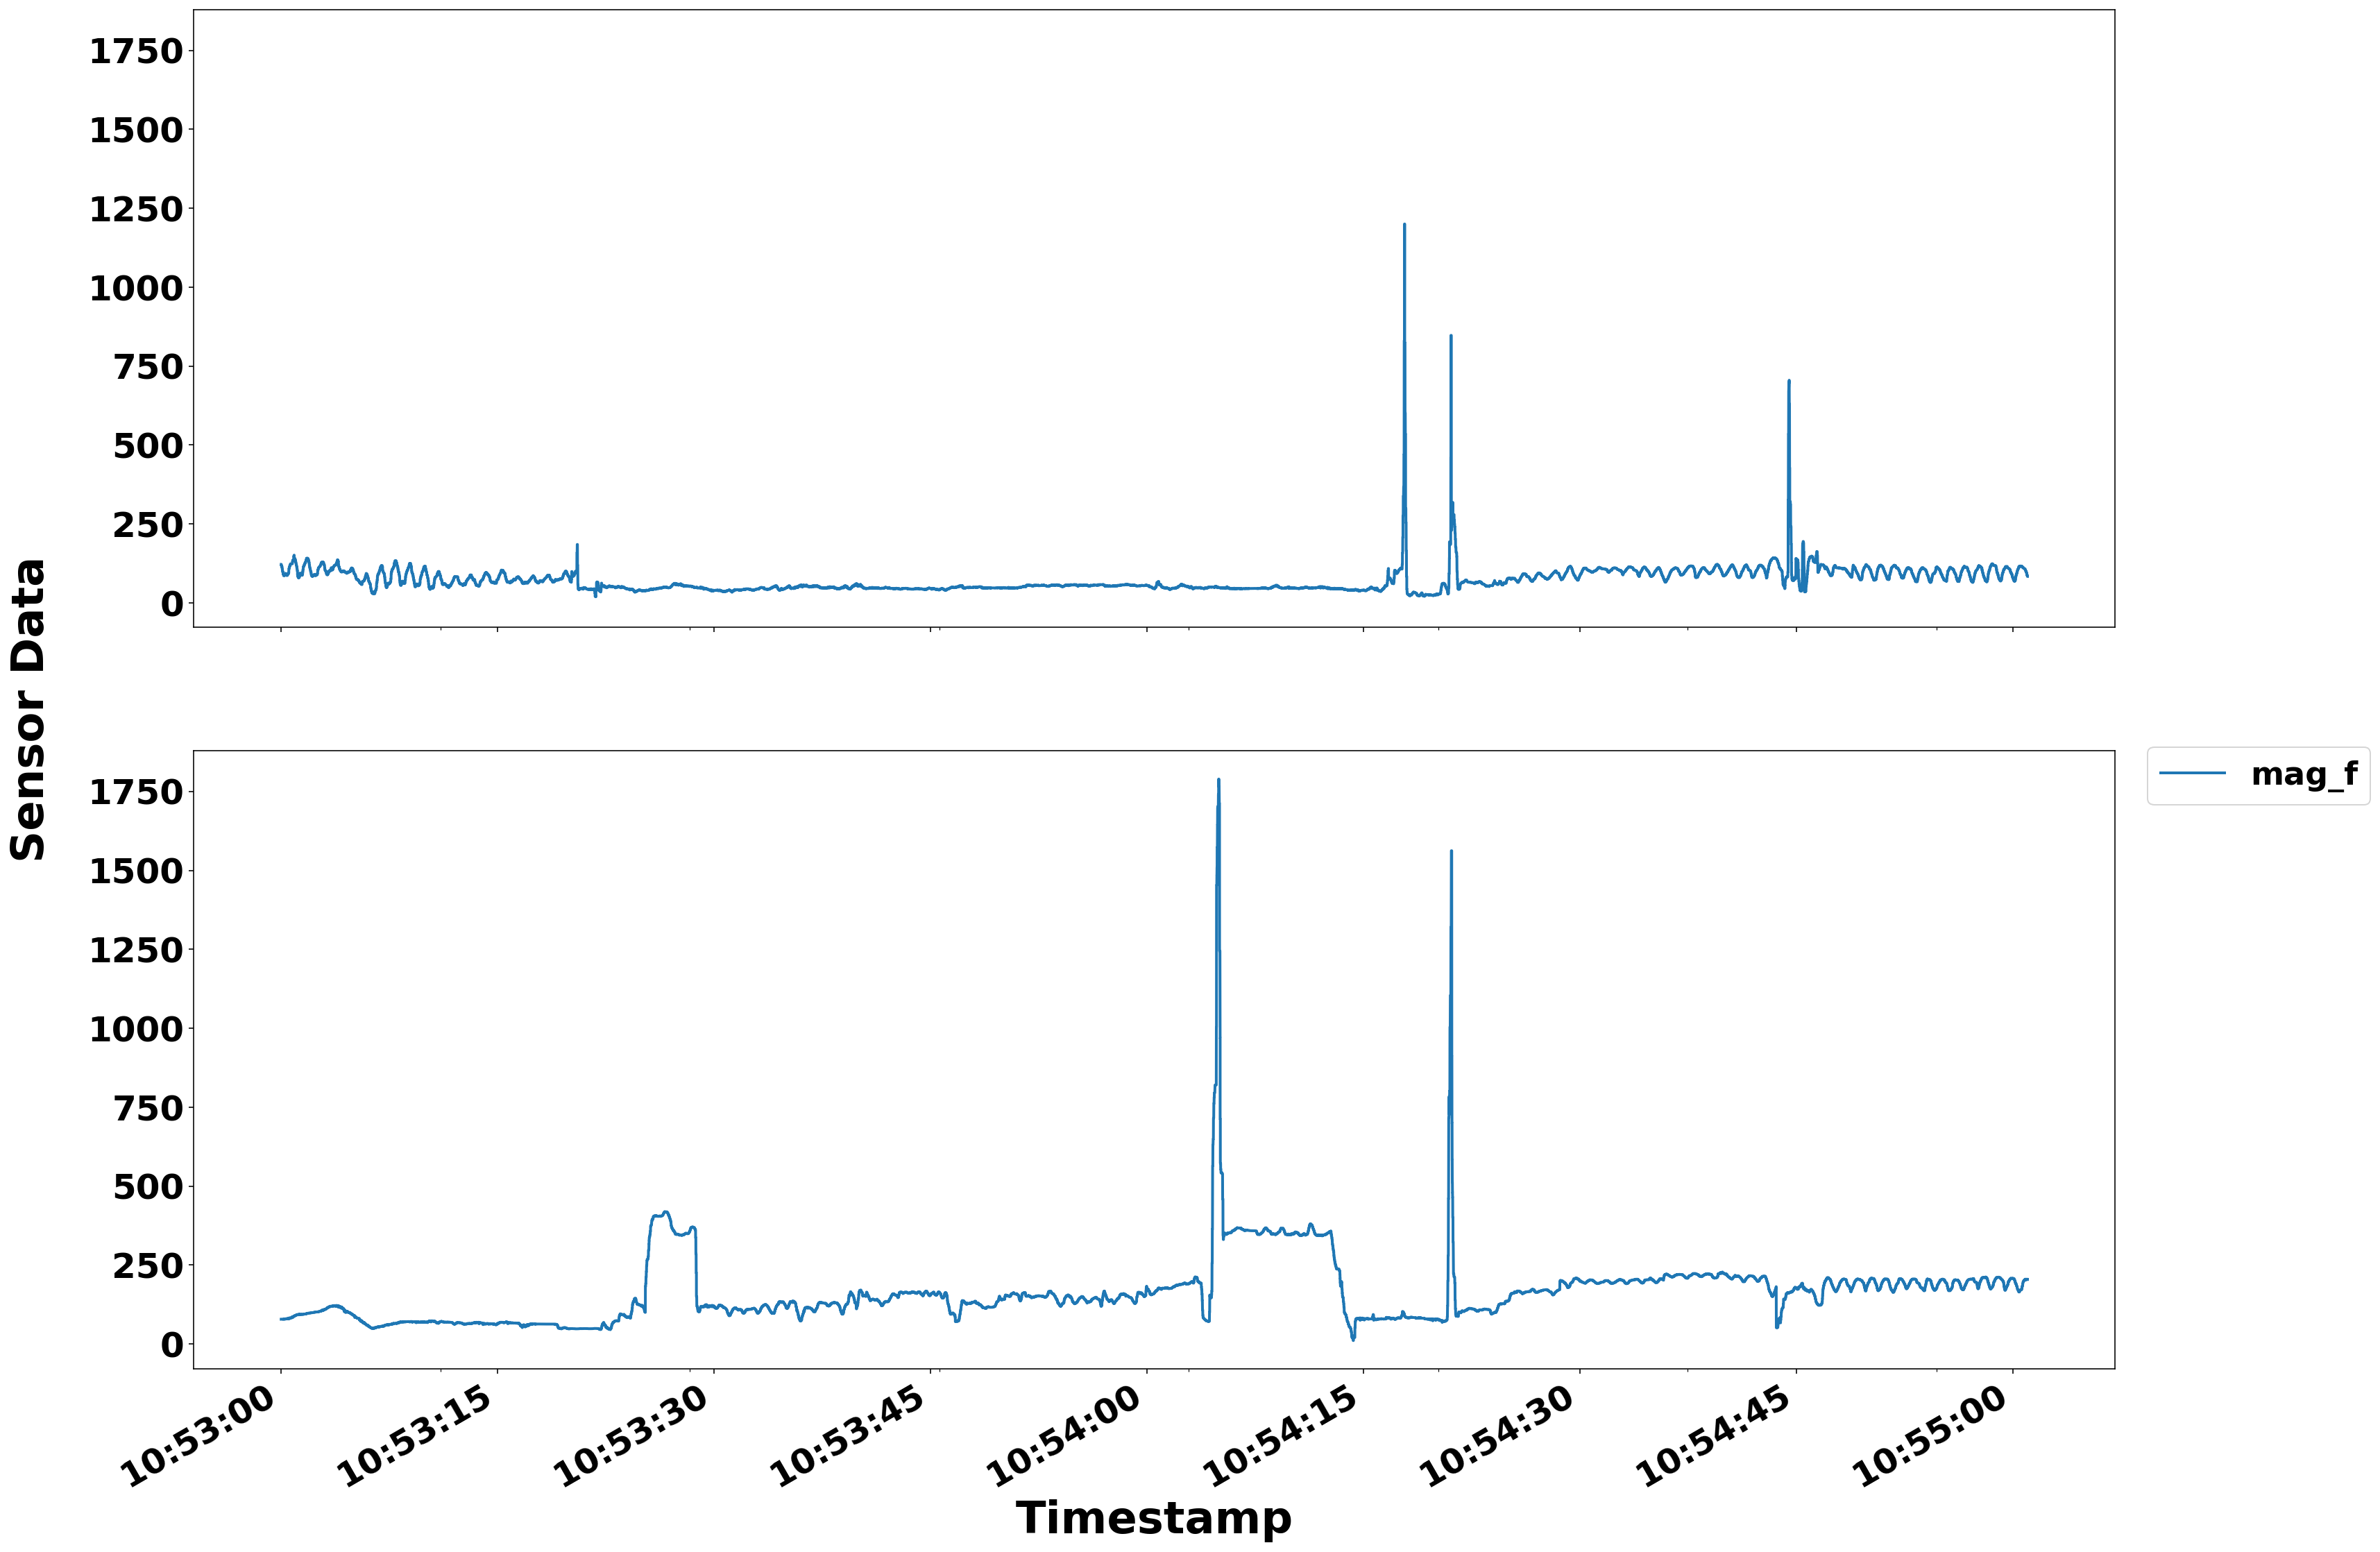

In [31]:
data_display = ['mag_f']
time_from = "2020-07-09 10:53:00"
time_to = "2020-07-09 10:55:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.894), 27, (25, 20),
                             dir_name, file_name + '_st_3f', False)

# Downsampling

In [32]:
data_ds = data_prep.downsampling('1s')

In [33]:
data_ds[0].head()

mag_x      mag_y      mag_z      mag_f  mag_acc  \
timestamp                                                                  
2020-07-09 10:52:20 -10.108065  19.415323 -46.144355  51.072886      3.0   
2020-07-09 10:52:21  -9.578843  19.025136 -45.336710  50.091387      3.0   
2020-07-09 10:52:22  -9.934381  19.216267 -44.876711  49.818898      3.0   
2020-07-09 10:52:23 -12.140180  20.123964 -44.606847  50.438836      3.0   
2020-07-09 10:52:24 -13.066789  19.623723 -44.531752  50.389889      3.0   

                        acc_x     acc_y     acc_z  acc_acc    gyro_x  \
timestamp                                                              
2020-07-09 10:52:20  0.655558  3.473321  9.258610      3.0  0.023212   
2020-07-09 10:52:21  0.776646  3.454342  9.151037      3.0  0.001495   
2020-07-09 10:52:22  0.887603  3.382038  9.177059      3.0 -0.014994   
2020-07-09 10:52:23  1.195403  3.143451  9.224139      3.0 -0.010574   
2020-07-09 10:52:24  1.115148  3.319025  9.180479      3.0 -0.001812   

                       gyro_y    gyro_z  gyro_acc    pos_lat     pos_lng  \
timestamp                                                                  
2020-07-09 10:52:20  0.028393  0.009716       3.0  35.145675  129.007296   
2020-07-09 10:52:21 -0.007222 -0.003920       3.0  35.145675  129.007296   
2020-07-09 10:52:22 -0.014931 -0.026689       3.0  35.145675  129.007296   
2020-07-09 10:52:23 -0.033778 -0.021388       3.0  35.145675  129.007296   
2020-07-09 10:52:24 -0.000017  0.010421       3.0  35.145675  129.007296   

                     pos_acc  
timestamp                     
2020-07-09 10:52:20   12.965  
2020-07-09 10:52:21   12.965  
2020-07-09 10:52:22   12.965  
2020-07-09 10:52:23   12.965  
2020-07-09 10:52:24   12.965

In [34]:
data_ds[1].head()

mag_x     mag_y      mag_z      mag_f  mag_acc  \
timestamp                                                                 
2020-07-09 10:52:26 -22.836418 -3.199016 -50.579332  55.588152      3.0   
2020-07-09 10:52:27 -22.307050 -3.217625 -50.403711  55.213238      3.0   
2020-07-09 10:52:28 -21.586008 -3.124067 -50.180784  54.716470      3.0   
2020-07-09 10:52:29 -20.587782 -3.013534 -49.864286  54.031605      3.0   
2020-07-09 10:52:30 -20.293809 -3.101126 -49.769794  53.837716      3.0   

                        acc_x     acc_y     acc_z  acc_acc    gyro_x  \
timestamp                                                              
2020-07-09 10:52:26 -0.343716  4.828509  8.630265      3.0  0.006534   
2020-07-09 10:52:27 -0.329367  4.740084  8.708293      3.0 -0.038691   
2020-07-09 10:52:28 -0.423883  4.566355  8.769793      3.0  0.014739   
2020-07-09 10:52:29 -0.246625  4.597875  8.801394      3.0  0.026487   
2020-07-09 10:52:30 -0.019443  4.958378  8.582312      3.0  0.044933   

                       gyro_y    gyro_z  gyro_acc    pos_lat     pos_lng  \
timestamp                                                                  
2020-07-09 10:52:26 -0.002852 -0.000310       3.0  35.148030  129.006742   
2020-07-09 10:52:27  0.027857  0.021183       3.0  35.148030  129.006742   
2020-07-09 10:52:28 -0.005577 -0.009834       3.0  35.148030  129.006742   
2020-07-09 10:52:29 -0.057004 -0.003236       3.0  35.146594  129.007081   
2020-07-09 10:52:30  0.057362  0.017412       3.0  35.145680  129.007298   

                         pos_acc  
timestamp                         
2020-07-09 10:52:26  1700.000000  
2020-07-09 10:52:27  1700.000000  
2020-07-09 10:52:28  1700.000000  
2020-07-09 10:52:29   669.435385  
2020-07-09 10:52:30    13.045000

## Plotting data

### Subplot

Data 1 : 
Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:55:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 4) 

Data 2 : 
Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:55:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 4) 



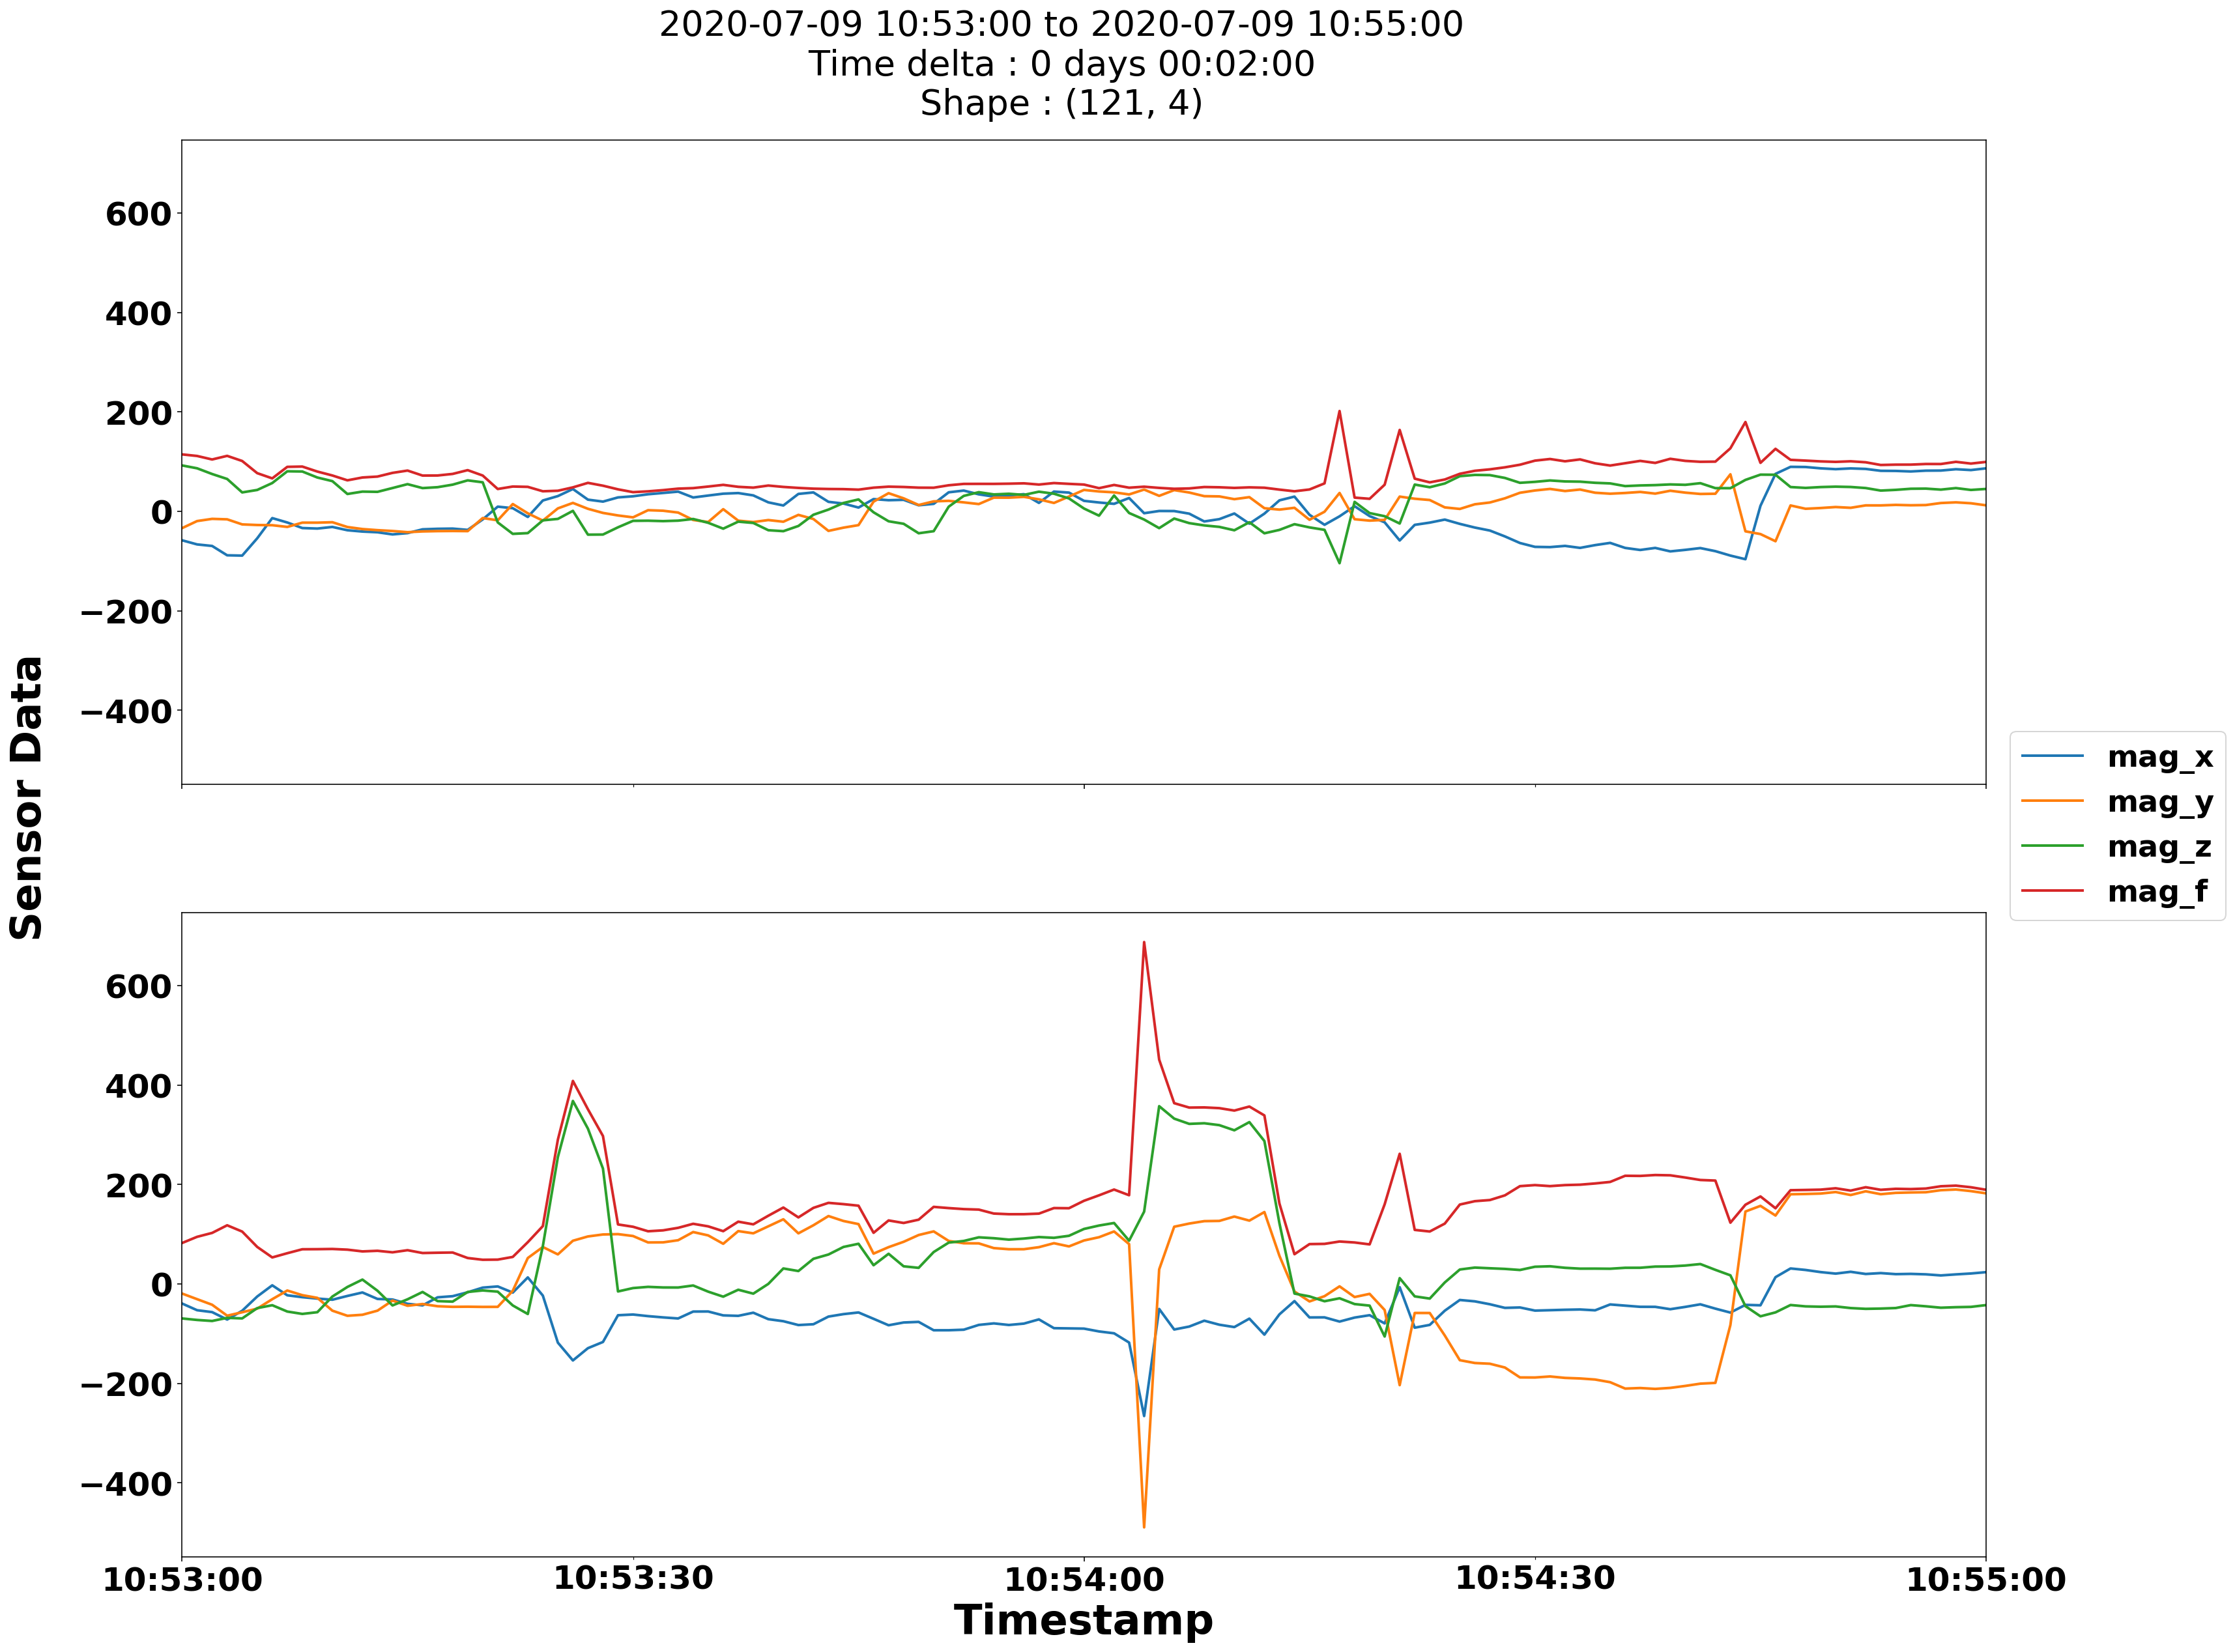

In [35]:
data_display = ['mag_x','mag_y','mag_z','mag_f']
time_from = "2020-07-09 10:53:00"
time_to = "2020-07-09 10:55:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.894), 27, (25, 20), 
                             dir_name, file_name + '_st_4(ds)', False)

Data 1 : 
Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:55:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 

Data 2 : 
Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:55:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 



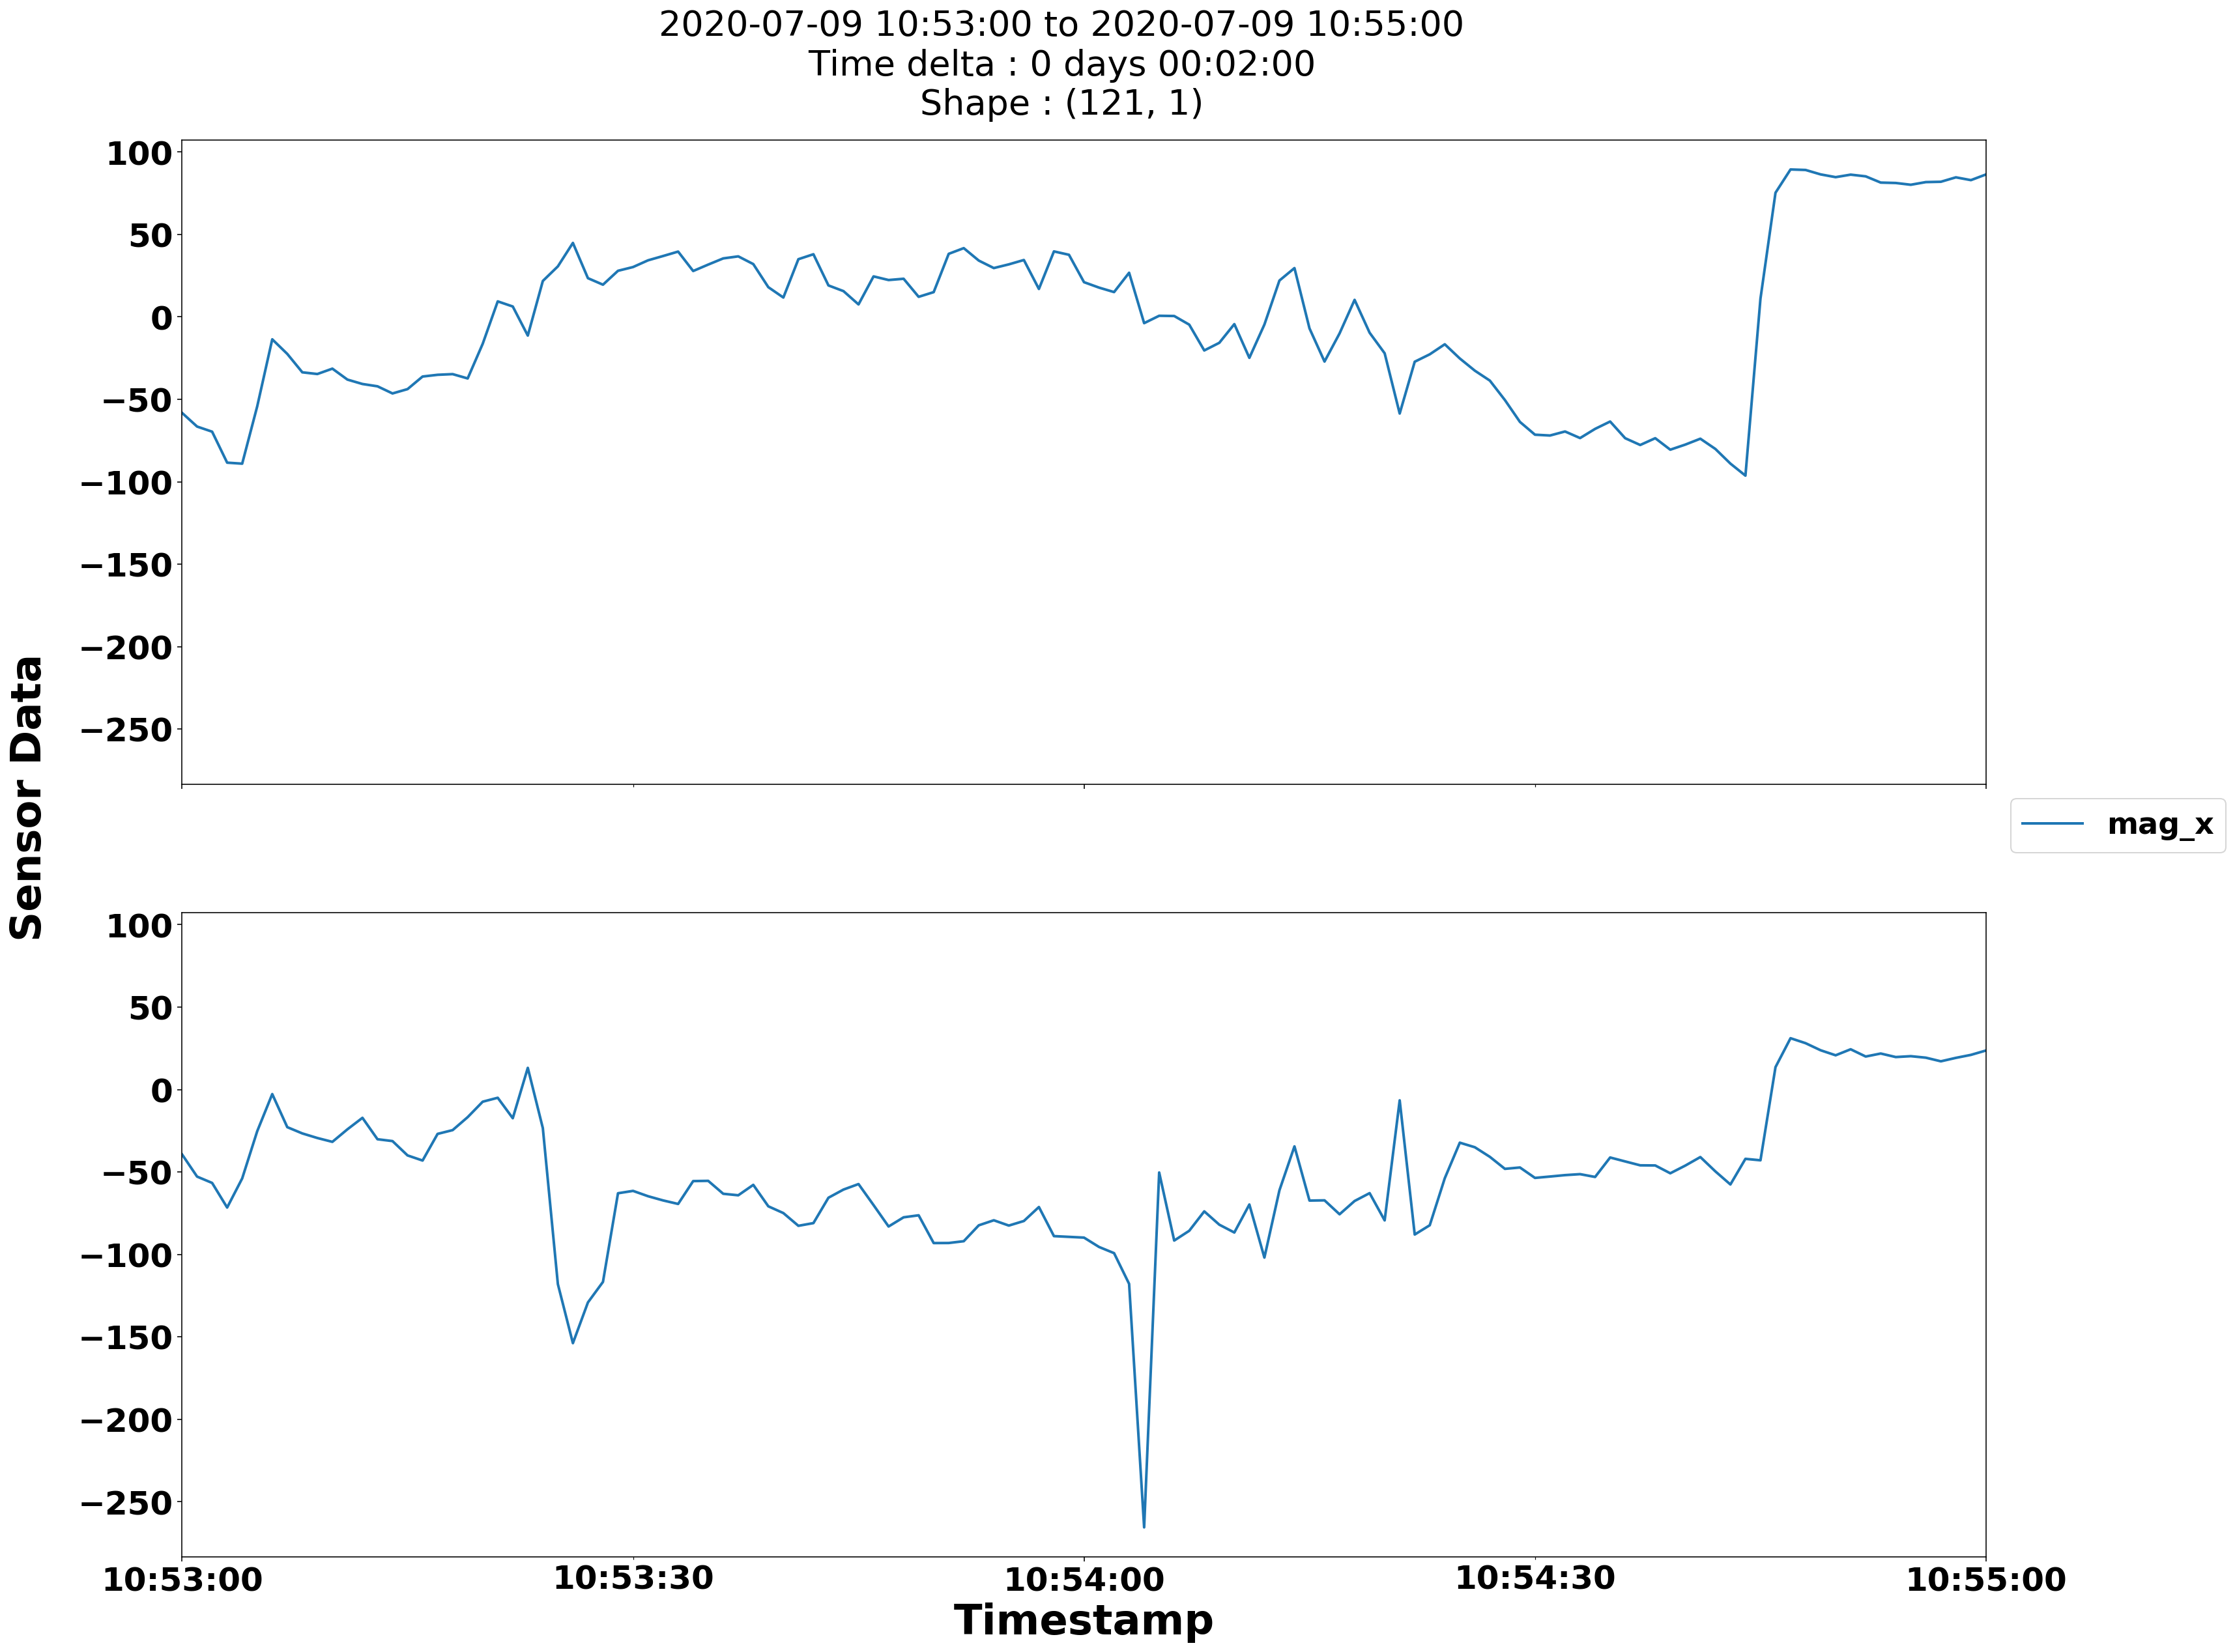

In [36]:
data_display = ['mag_x']
time_from = "2020-07-09 10:53:00"
time_to = "2020-07-09 10:55:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.894), 27, (25, 20), 
                             dir_name, file_name + '_st_5x(ds)', False)

Data 1 : 
Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:55:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 

Data 2 : 
Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:55:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 



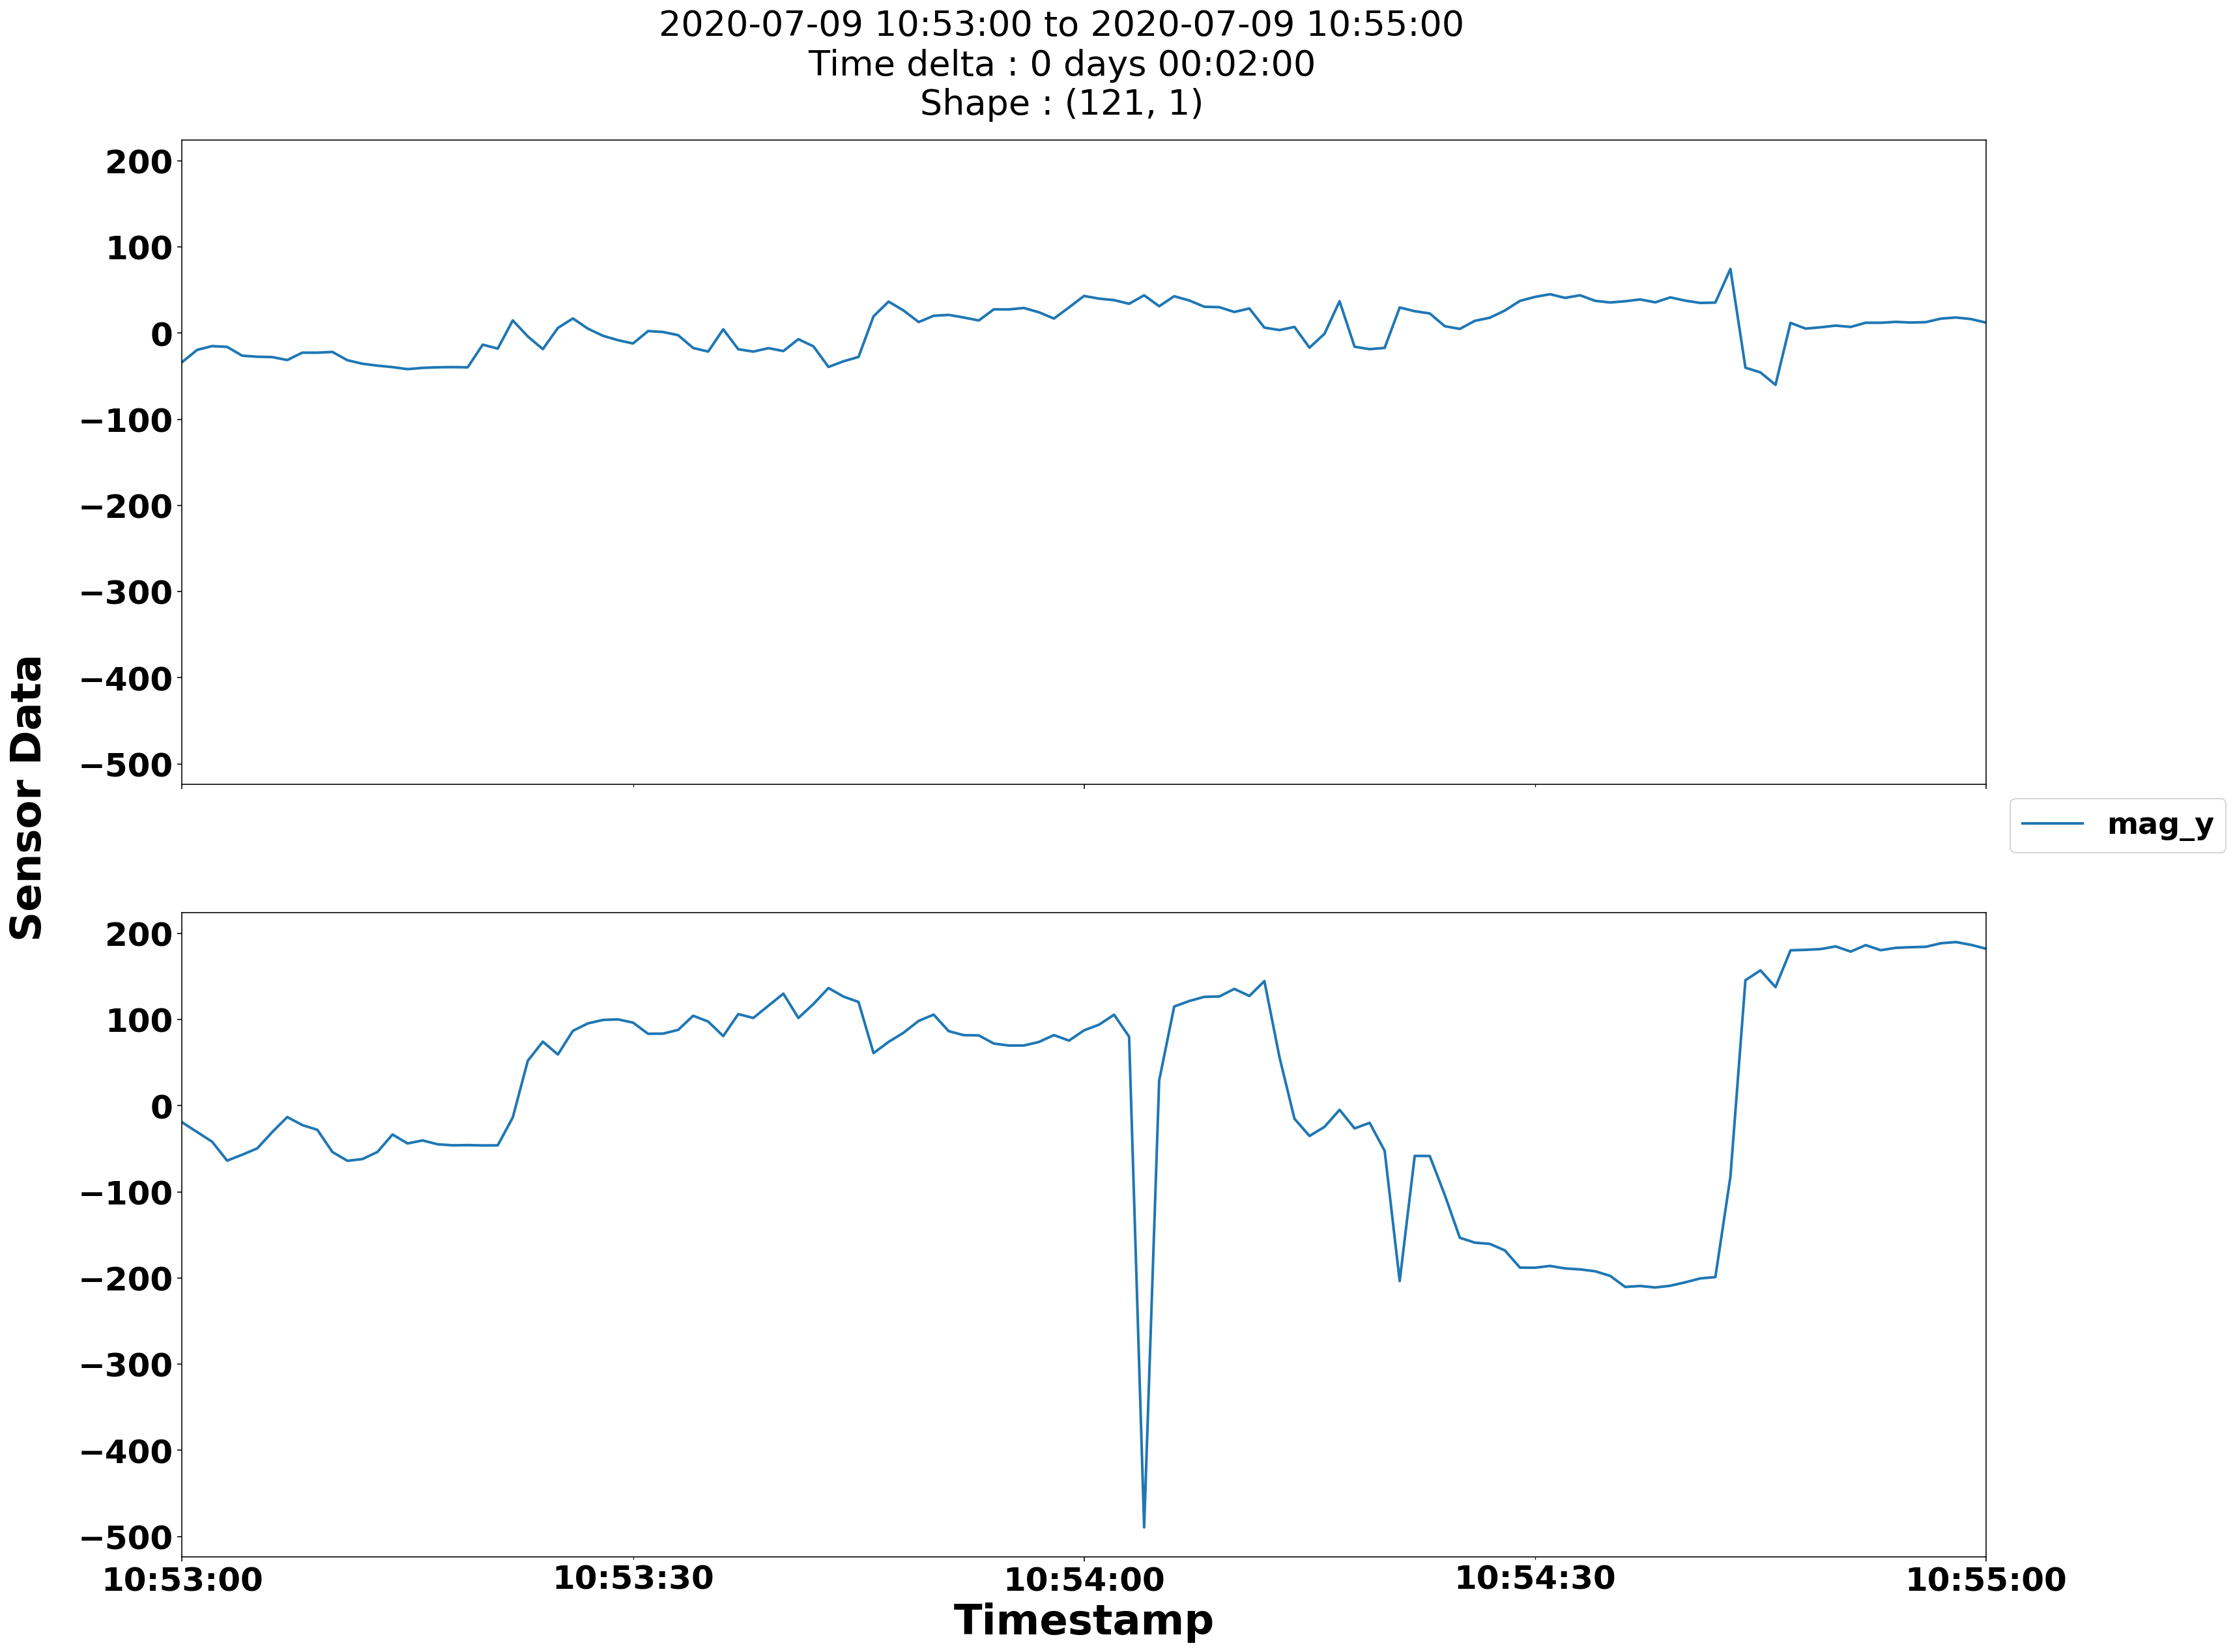

In [37]:
data_display = ['mag_y']
time_from = "2020-07-09 10:53:00"
time_to = "2020-07-09 10:55:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.894), 27, (25, 20),
                             dir_name, file_name + '_st_5y(ds)', False)

Data 1 : 
Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:55:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 

Data 2 : 
Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:55:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 



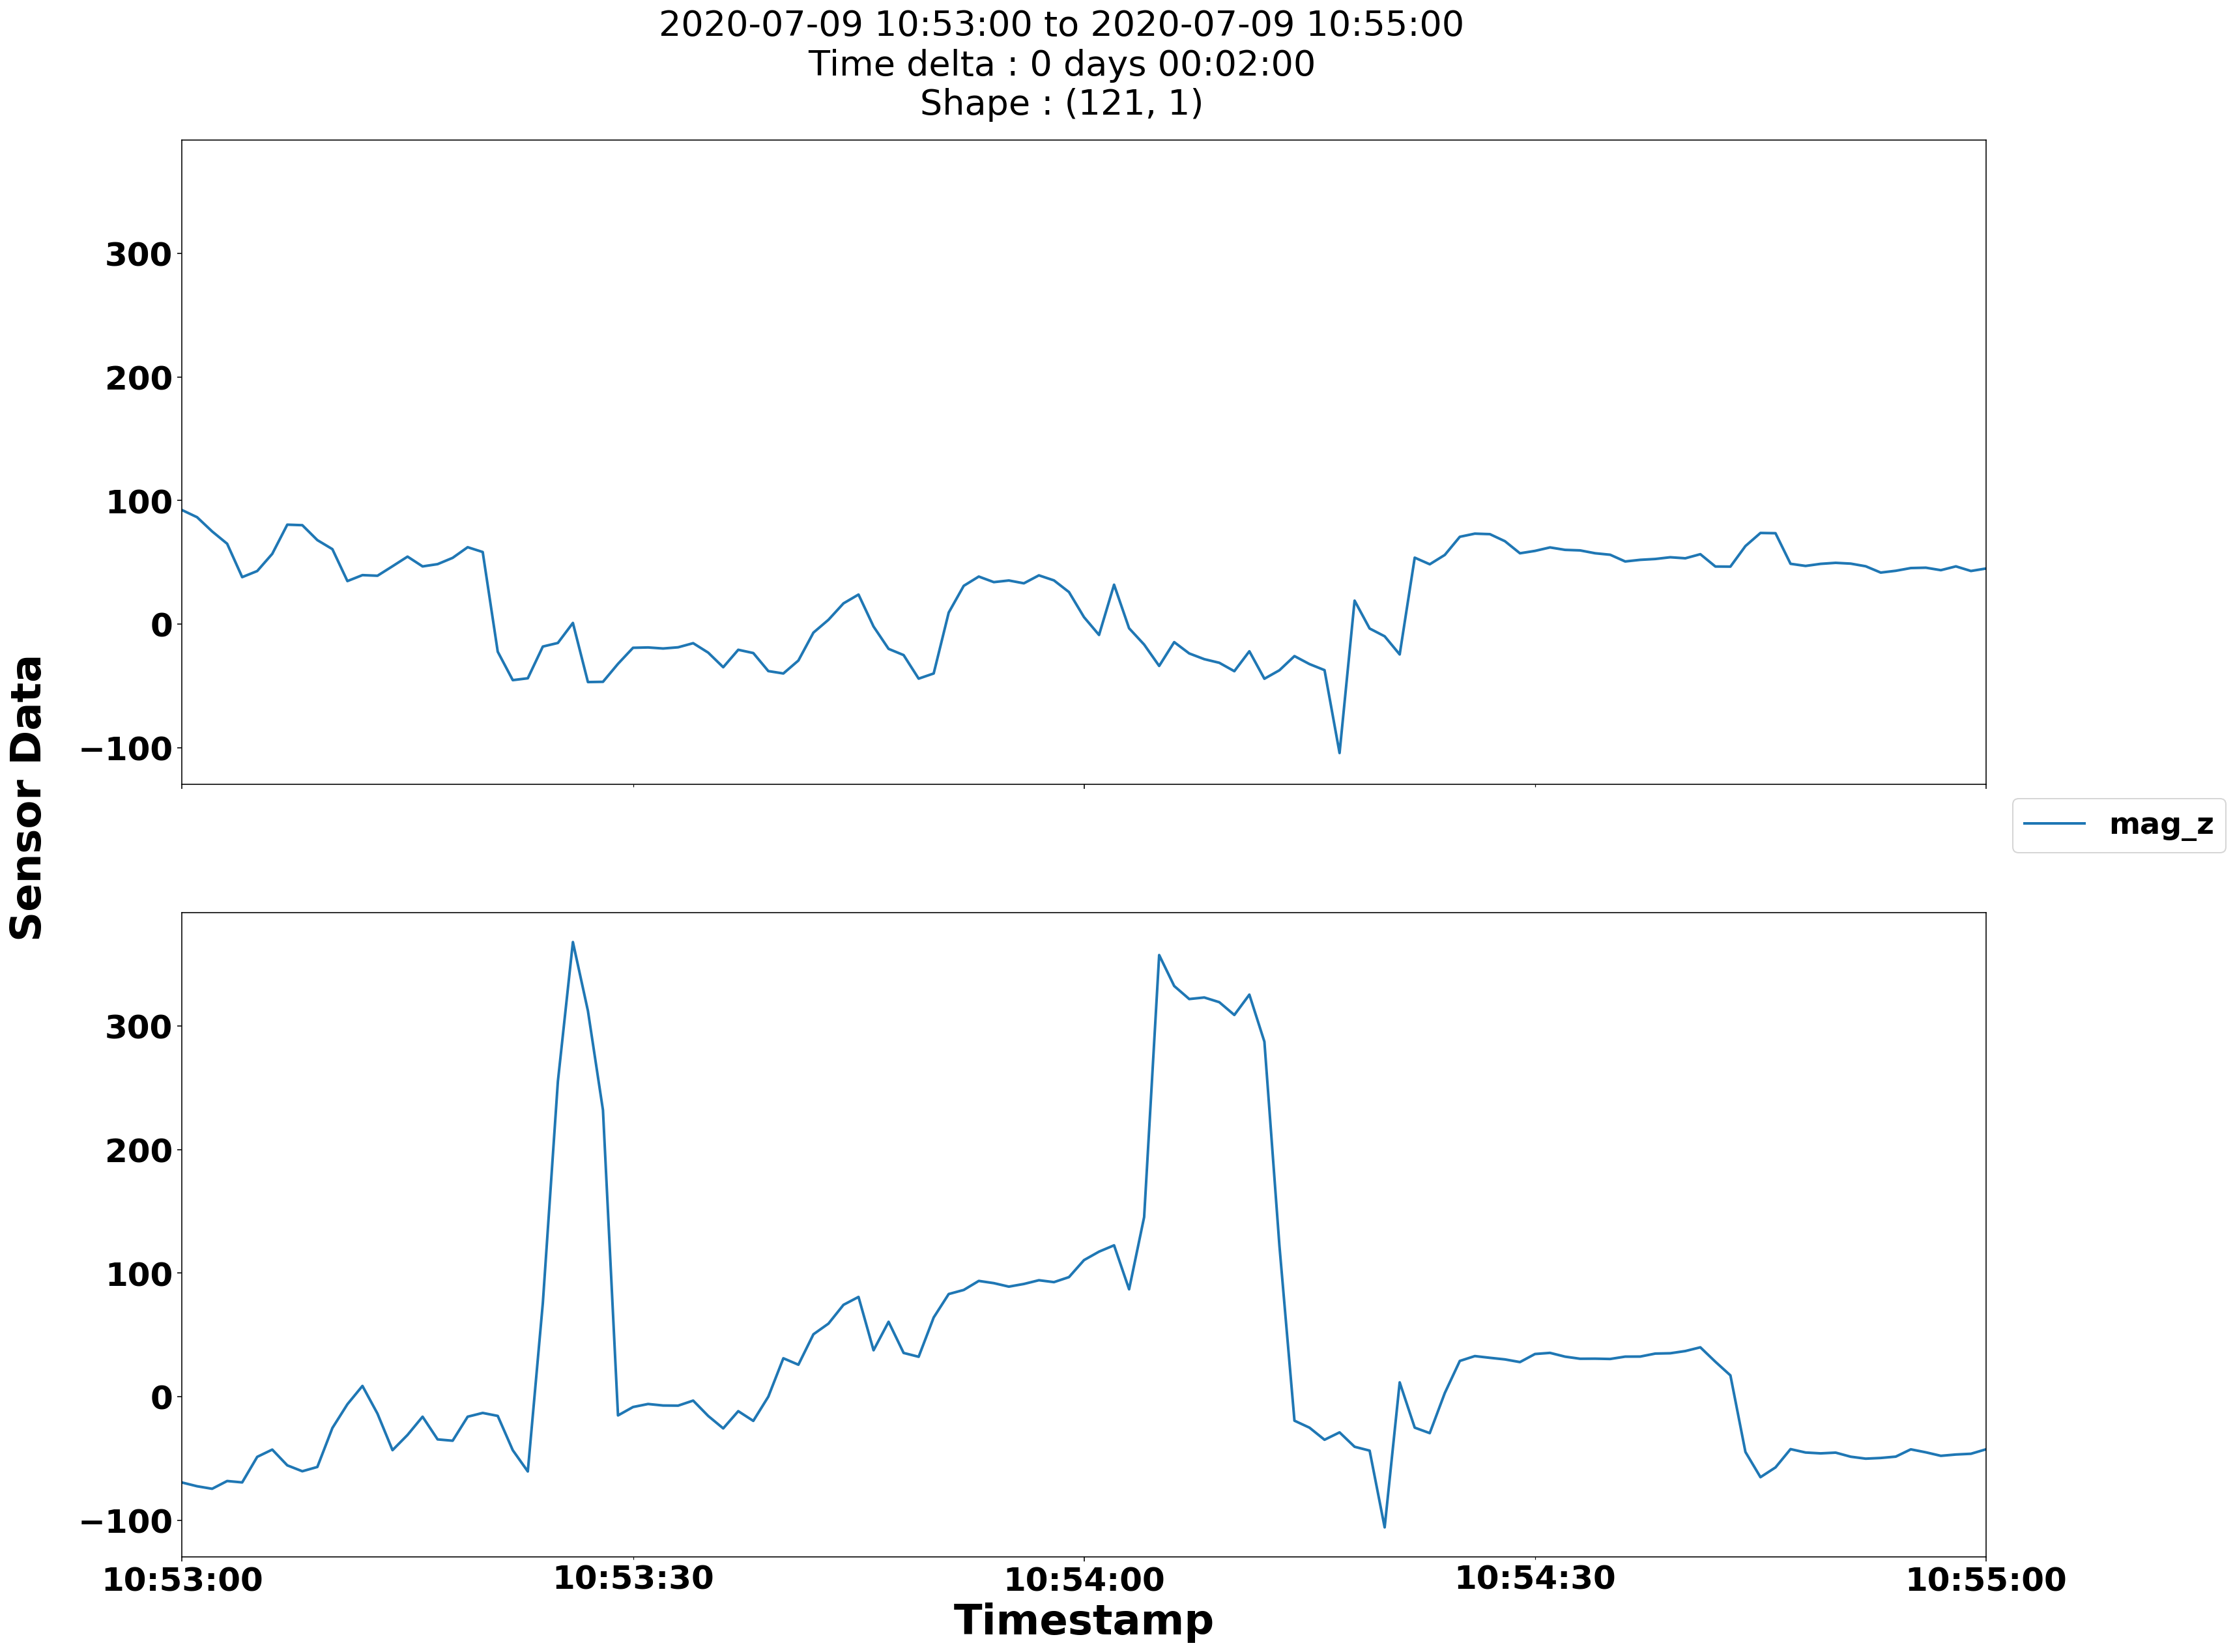

In [38]:
data_display = ['mag_z']
time_from = "2020-07-09 10:53:00"
time_to = "2020-07-09 10:55:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.894), 27, (25, 20), 
                             dir_name, file_name + '_st_5z(ds)', False)

Data 1 : 
Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:55:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 

Data 2 : 
Start :
 2020-07-09 10:53:00
End :
 2020-07-09 10:55:00
Time delta :
 0 days 00:02:00
Shape :
 (121, 1) 



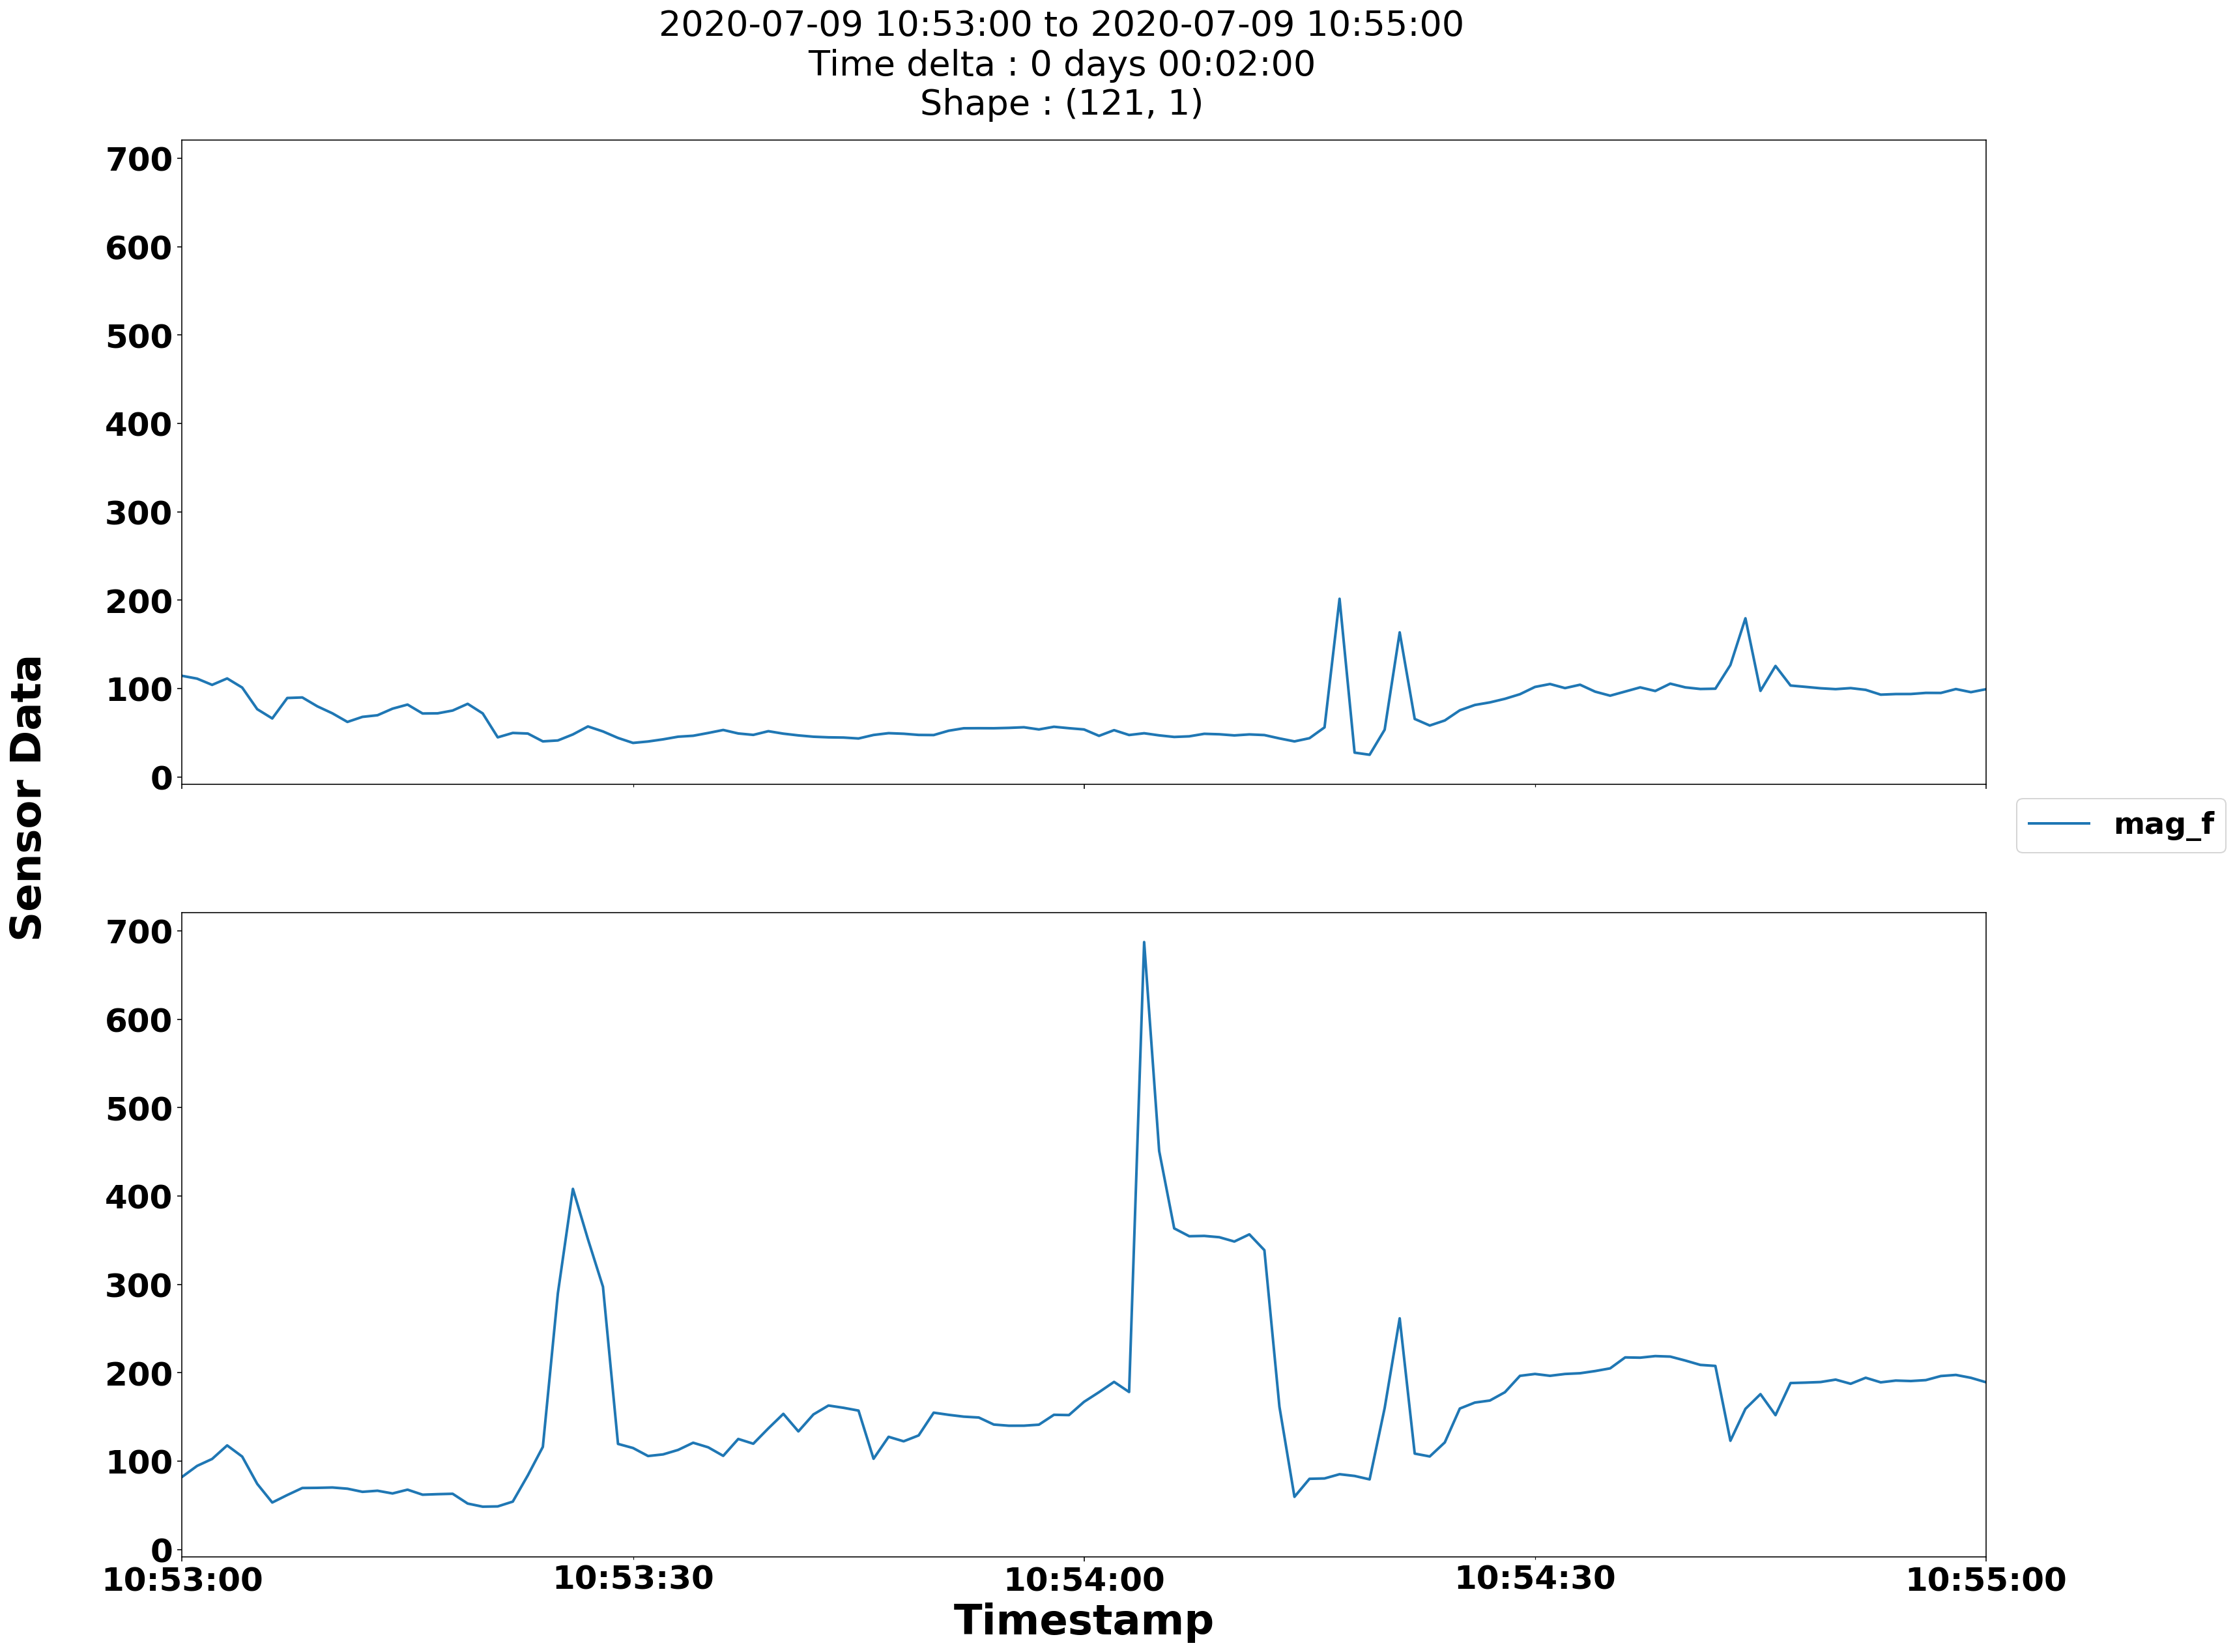

In [40]:
data_display = ['mag_f']
time_from = "2020-07-09 10:53:00"
time_to = "2020-07-09 10:55:00"
data_plotting.plot_data_comp(data, (time_from, time_to), data_display,
                             'Timestamp', 'Sensor Data', (23, 0.894), 27, (25, 20), 
                             dir_name, file_name + '_st_5f(ds)', False)